In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns;
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

In [3]:
predict = pd.read_csv("test2.csv")

In [4]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Data columns (total 47 columns):
NU_INSCRICAO              4522 non-null object
CO_UF_RESIDENCIA          4522 non-null int64
SG_UF_RESIDENCIA          4522 non-null object
NU_IDADE                  4522 non-null int64
TP_SEXO                   4522 non-null object
TP_COR_RACA               4522 non-null int64
TP_NACIONALIDADE          4522 non-null int64
TP_ST_CONCLUSAO           4522 non-null int64
TP_ANO_CONCLUIU           4522 non-null int64
TP_ESCOLA                 4522 non-null int64
TP_ENSINO                 1334 non-null float64
IN_TREINEIRO              4522 non-null int64
TP_DEPENDENCIA_ADM_ESC    1334 non-null float64
IN_BAIXA_VISAO            4522 non-null int64
IN_CEGUEIRA               4522 non-null int64
IN_SURDEZ                 4522 non-null int64
IN_DISLEXIA               4522 non-null int64
IN_DISCALCULIA            4522 non-null int64
IN_SABATISTA              4522 non-null int64
IN_GESTANTE 

In [6]:
predict.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,308f78623f08debb592f85560c1b87b5df05e364,31,MG,44,M,3,1,1,10,1,...,40.0,380.0,C,B,F,B,B,C,H,A
1,0ef34d3340773d13c98ecc8fcd888150a24c63c3,29,BA,17,F,1,1,2,0,3,...,160.0,900.0,G,G,P,B,B,A,NaN,D
2,e5a70516338bf0a1b0d7ccda3ed995a7400a95ff,31,MG,17,F,2,1,2,0,2,...,20.0,480.0,H,E,C,A,A,C,D,A
3,1eda43516bcc8b2f081e447535c73579cb030b7e,31,MG,19,F,1,1,1,1,1,...,40.0,440.0,E,E,B,A,B,C,F,A
4,b5b00cb4cb52757ea34990f4c2072c4d059068b7,53,DF,20,M,1,1,1,1,1,...,80.0,560.0,E,G,Q,D,B,A,NaN,D


In [7]:
columns_predict = predict.columns.tolist()
columns_predict.append("NU_NOTA_MT")

In [8]:
train = train[columns_predict]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 48 columns):
NU_INSCRICAO              13549 non-null object
CO_UF_RESIDENCIA          13549 non-null int64
SG_UF_RESIDENCIA          13549 non-null object
NU_IDADE                  13549 non-null int64
TP_SEXO                   13549 non-null object
TP_COR_RACA               13549 non-null int64
TP_NACIONALIDADE          13549 non-null int64
TP_ST_CONCLUSAO           13549 non-null int64
TP_ANO_CONCLUIU           13549 non-null int64
TP_ESCOLA                 13549 non-null int64
TP_ENSINO                 4249 non-null float64
IN_TREINEIRO              13549 non-null int64
TP_DEPENDENCIA_ADM_ESC    4249 non-null float64
IN_BAIXA_VISAO            13549 non-null int64
IN_CEGUEIRA               13549 non-null int64
IN_SURDEZ                 13549 non-null int64
IN_DISLEXIA               13549 non-null int64
IN_DISCALCULIA            13549 non-null int64
IN_SABATISTA              13549 non-null

In [10]:
train = train[train["NU_NOTA_MT"].isnull() == False]

In [11]:
train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,5f1dbdc5bcb5f346d3589b50d1866c96414ff5a3,31,MG,18,M,2,1,1,1,1,...,580.0,D,E,C,B,B,A,NaN,A,513.2
3,e32d6ef30781c32abfde7deb8073630defd2f487,35,SP,18,F,3,1,2,0,2,...,680.0,C,E,D,B,B,A,NaN,A,527.9
4,8b6337d6e88ac810d17c96fdfb8099963d527ad3,29,BA,21,M,3,1,1,3,1,...,380.0,E,E,G,C,B,A,NaN,A,547.8
5,97dcc7d0efe37a660c86c231ed71def383308262,25,PB,17,F,3,1,2,0,2,...,680.0,B,D,C,B,B,A,NaN,A,403.8
6,7abda9d4d778b7f7f6d3ae54f991cb9e3855c300,42,SC,35,F,3,1,1,10,1,...,560.0,E,D,E,A,A,C,I,B,483.7


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10339 entries, 0 to 13548
Data columns (total 48 columns):
NU_INSCRICAO              10339 non-null object
CO_UF_RESIDENCIA          10339 non-null int64
SG_UF_RESIDENCIA          10339 non-null object
NU_IDADE                  10339 non-null int64
TP_SEXO                   10339 non-null object
TP_COR_RACA               10339 non-null int64
TP_NACIONALIDADE          10339 non-null int64
TP_ST_CONCLUSAO           10339 non-null int64
TP_ANO_CONCLUIU           10339 non-null int64
TP_ESCOLA                 10339 non-null int64
TP_ENSINO                 3779 non-null float64
IN_TREINEIRO              10339 non-null int64
TP_DEPENDENCIA_ADM_ESC    3779 non-null float64
IN_BAIXA_VISAO            10339 non-null int64
IN_CEGUEIRA               10339 non-null int64
IN_SURDEZ                 10339 non-null int64
IN_DISLEXIA               10339 non-null int64
IN_DISCALCULIA            10339 non-null int64
IN_SABATISTA              10339 non-null

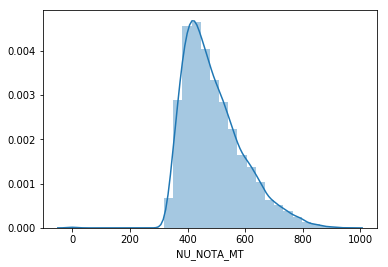

In [13]:
sns.distplot(train["NU_NOTA_MT"],bins =30)

In [14]:
train[train["NU_NOTA_MT"] == 0]

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
432,483edce66a4028e218eba51bd7d1159a8e06e2d1,31,MG,30,F,1,1,1,8,1,...,500.0,B,B,D,A,A,B,C,A,0.0
5408,032c4a21f3a2307d0e5391fa8e06b0185037dbe4,52,GO,20,M,3,1,4,0,1,...,480.0,B,E,B,B,B,C,D,A,0.0
7726,114ed037d9dcbdf7819501f6d91e94b8d2de5e77,17,TO,30,F,4,1,3,0,1,...,420.0,B,C,B,A,A,C,D,A,0.0
10098,354476a97ee466854e0d3da9462d8048391a9de3,28,SE,29,F,1,1,1,10,1,...,0.0,H,B,C,A,B,B,M,A,0.0
10323,e427322d03dc41d79e6d6471211d2a9f2ff4149f,35,SP,32,M,1,1,1,10,1,...,440.0,F,F,H,D,B,C,K,C,0.0
13300,84e50b477d029a3f18c92f55a60cdeb1c2a45630,53,DF,24,M,3,2,4,0,1,...,440.0,F,G,E,E,B,C,A,A,0.0


## Análise de dados

### UF
A partir dos dados é possível perceber que existe uma diferença de comportamento por estado, e portanto, variável deve entrar como Dummies

In [15]:
train["SG_UF_RESIDENCIA"].value_counts()

SP    1676
CE    1219
MG    1062
BA     698
RJ     670
PE     538
PR     523
RS     439
PA     409
GO     373
MA     343
PB     260
DF     215
RN     211
MT     200
ES     193
AM     190
SC     183
AL     179
PI     165
MS     131
SE     124
TO      94
RO      86
AP      74
AC      59
RR      25
Name: SG_UF_RESIDENCIA, dtype: int64

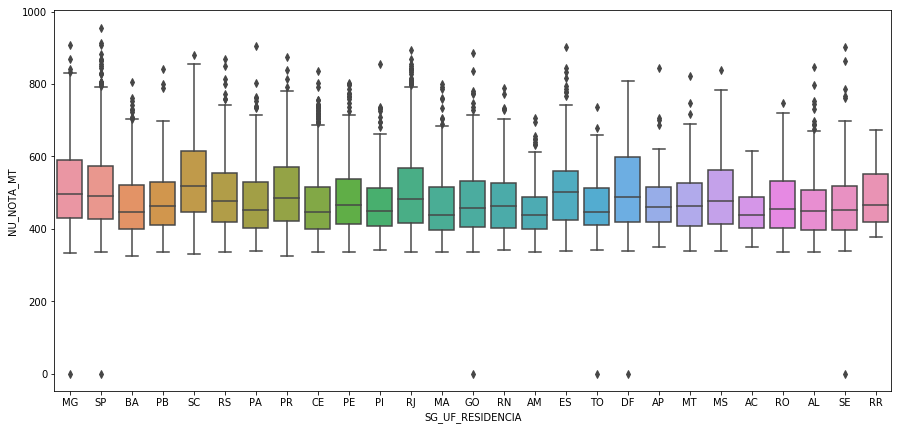

In [16]:
plt.figure(figsize=(15,7))
sns.boxplot(x='SG_UF_RESIDENCIA', y ='NU_NOTA_MT', data=train)

### Idade

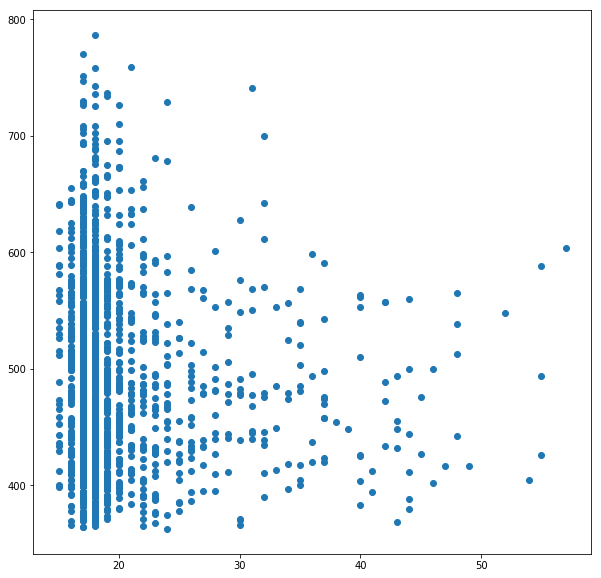

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(train["NU_IDADE"][train["SG_UF_RESIDENCIA"] == "SP"], train["NU_NOTA_CN"][train["SG_UF_RESIDENCIA"] == "SP"])

In [18]:
np.corrcoef(train["NU_IDADE"], train["NU_NOTA_MT"])

array([[ 1.        , -0.08546402],
       [-0.08546402,  1.        ]])

### Sexo
Diferença de média consideraval, entrar no modelo

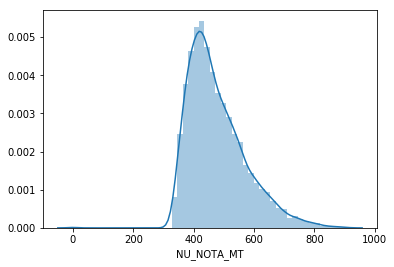

In [19]:
sns.distplot(train["NU_NOTA_MT"][train["TP_SEXO"] == "F"].dropna(),bins =50)

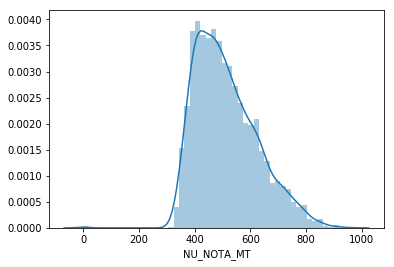

In [20]:
sns.distplot(train["NU_NOTA_MT"][train["TP_SEXO"] == "M"].dropna(),bins =50)

In [21]:
print("Mulher")
print(train["NU_NOTA_MT"][train["TP_SEXO"] == "F"].describe())
print("Homem")
print(train["NU_NOTA_MT"][train["TP_SEXO"] == "M"].describe())

Mulher
count    6560.000000
mean      477.135412
std        95.556070
min         0.000000
25%       406.675000
50%       455.400000
75%       529.400000
max       908.200000
Name: NU_NOTA_MT, dtype: float64
Homem
count    3779.000000
mean      513.109129
std       111.202151
min         0.000000
25%       425.050000
50%       493.300000
75%       582.150000
max       955.900000
Name: NU_NOTA_MT, dtype: float64


In [22]:
train["TP_SEXO"].value_counts()

F    6560
M    3779
Name: TP_SEXO, dtype: int64

### Cor Raça
Existe diferença, fazer dummies

In [23]:
train["TP_COR_RACA"].value_counts()

3    4818
1    3735
2    1306
4     256
0     177
5      47
Name: TP_COR_RACA, dtype: int64

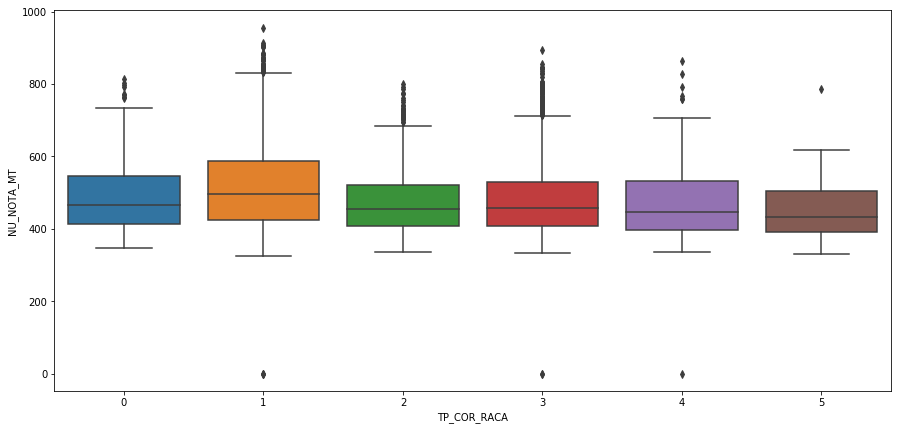

In [24]:
plt.figure(figsize=(15,7))
sns.boxplot(x='TP_COR_RACA', y ='NU_NOTA_MT', data=train)

In [25]:
print("Não declado")
print(train["NU_NOTA_MT"][train["TP_COR_RACA"] == 0].describe())
print("Branca")
print(train["NU_NOTA_MT"][train["TP_COR_RACA"] == 1].describe())
print("Preta")
print(train["NU_NOTA_MT"][train["TP_COR_RACA"] == 2].describe())
print("Parda")
print(train["NU_NOTA_MT"][train["TP_COR_RACA"] == 3].describe())
print("Amarela")
print(train["NU_NOTA_MT"][train["TP_COR_RACA"] == 4].describe())
print("Indígena")
print(train["NU_NOTA_MT"][train["TP_COR_RACA"] == 5].describe())

Não declado
count    177.000000
mean     497.852542
std      110.399165
min      348.200000
25%      412.500000
50%      466.800000
75%      546.300000
max      813.100000
Name: NU_NOTA_MT, dtype: float64
Branca
count    3735.000000
mean      515.701847
std       115.188769
min         0.000000
25%       425.600000
50%       494.900000
75%       587.850000
max       955.900000
Name: NU_NOTA_MT, dtype: float64
Preta
count    1306.000000
mean      471.438132
std        85.490102
min       334.700000
25%       406.525000
50%       454.700000
75%       519.825000
max       801.400000
Name: NU_NOTA_MT, dtype: float64
Parda
count    4818.000000
mean      476.662661
std        92.725242
min         0.000000
25%       406.925000
50%       457.650000
75%       529.275000
max       894.800000
Name: NU_NOTA_MT, dtype: float64
Amarela
count    256.000000
mean     472.819531
std      104.778262
min        0.000000
25%      397.125000
50%      445.550000
75%      530.825000
max      862.600000
Name:

### Nacionalidade
Diferença consideravel, fazer dummies, tomar cuidado com a quantidade de dados

In [26]:
train["TP_NACIONALIDADE"].value_counts()

1    9910
2     383
4      31
3      10
0       5
Name: TP_NACIONALIDADE, dtype: int64

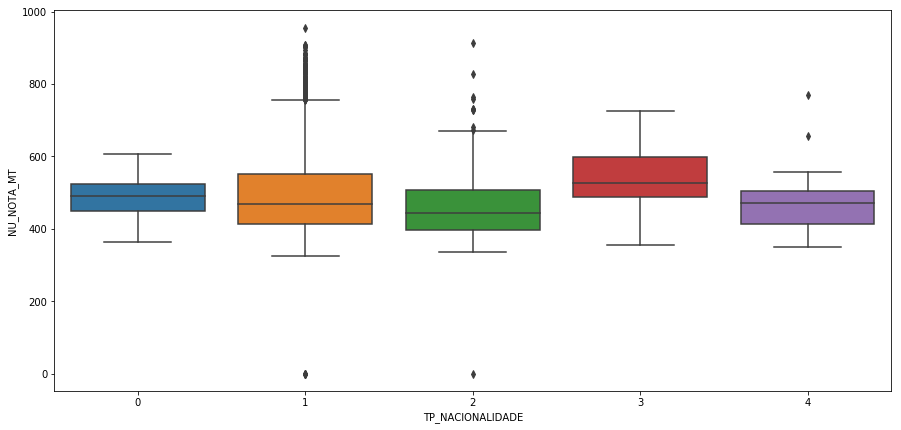

In [27]:
plt.figure(figsize=(15,7))
sns.boxplot(x='TP_NACIONALIDADE', y ='NU_NOTA_MT', data=train)

In [28]:
print("Não declado")
print(train["NU_NOTA_MT"][train["TP_NACIONALIDADE"] == 0].describe())
print("Brasileiro")
print(train["NU_NOTA_MT"][train["TP_NACIONALIDADE"] == 1].describe())
print("Brasileiro Naturalizado")
print(train["NU_NOTA_MT"][train["TP_NACIONALIDADE"] == 2].describe())
print("Estrangeiro")
print(train["NU_NOTA_MT"][train["TP_NACIONALIDADE"] == 3].describe())
print("Basileiro nascido no exterior")
print(train["NU_NOTA_MT"][train["TP_NACIONALIDADE"] == 4].describe())

Não declado
count      5.000000
mean     487.140000
std       90.319284
min      363.600000
25%      448.700000
50%      491.300000
75%      524.700000
max      607.400000
Name: NU_NOTA_MT, dtype: float64
Brasileiro
count    9910.000000
mean      491.441302
std       103.375051
min         0.000000
25%       412.725000
50%       468.650000
75%       550.575000
max       955.900000
Name: NU_NOTA_MT, dtype: float64
Brasileiro Naturalizado
count    383.000000
mean     460.684334
std       89.538752
min        0.000000
25%      397.500000
50%      443.000000
75%      507.450000
max      913.300000
Name: NU_NOTA_MT, dtype: float64
Estrangeiro
count     10.000000
mean     539.230000
std      111.783104
min      355.600000
25%      486.725000
50%      525.750000
75%      599.350000
max      727.000000
Name: NU_NOTA_MT, dtype: float64
Basileiro nascido no exterior
count     31.000000
mean     470.783871
std       87.087118
min      351.200000
25%      414.100000
50%      470.900000
75%      50

### Situação de conclusão EM

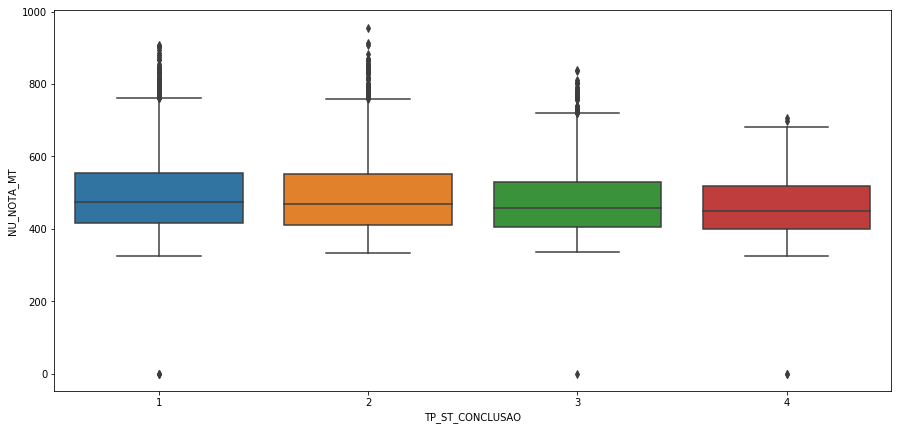

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(x='TP_ST_CONCLUSAO', y ='NU_NOTA_MT', data=train)

### Ano conclusao

In [30]:
train["TP_ANO_CONCLUIU"].value_counts()

0     5657
1     1427
2      789
10     643
3      531
4      367
5      255
6      209
7      182
8      142
9      137
Name: TP_ANO_CONCLUIU, dtype: int64

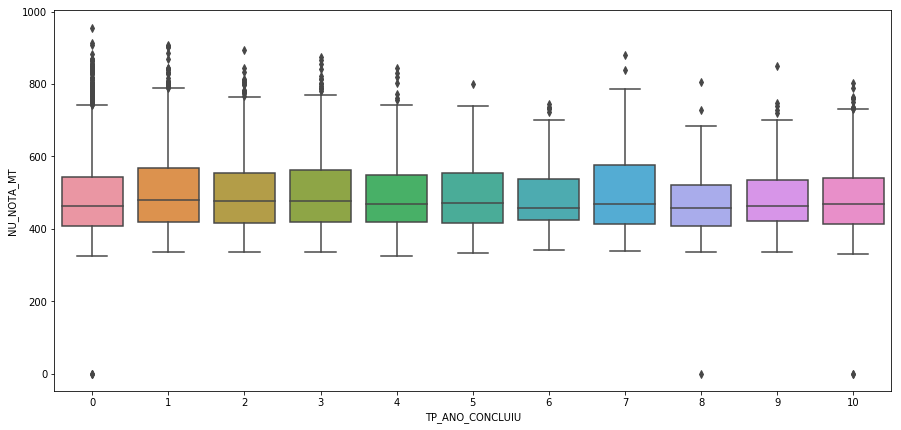

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(x='TP_ANO_CONCLUIU', y ='NU_NOTA_MT', data=train)

In [32]:
np.corrcoef(train["TP_ANO_CONCLUIU"][train["TP_ANO_CONCLUIU"] != 0], train["NU_NOTA_MT"][train["TP_ANO_CONCLUIU"] != 0])

array([[ 1.        , -0.07465135],
       [-0.07465135,  1.        ]])

### Tipo escola

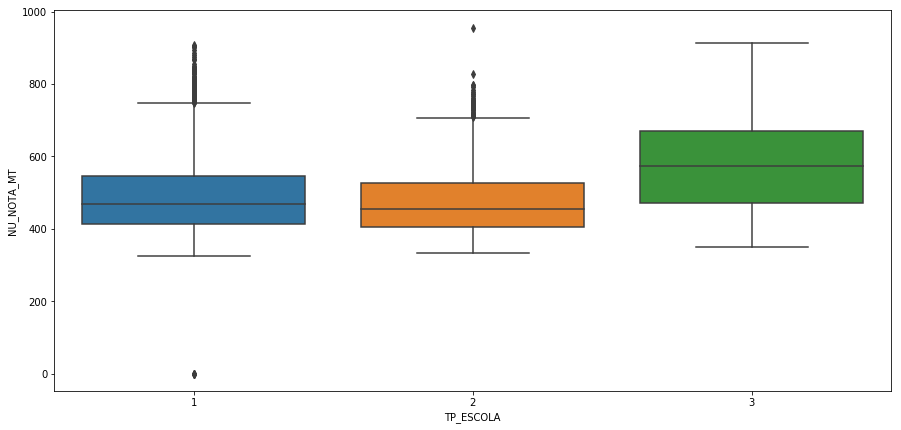

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(x='TP_ESCOLA', y ='NU_NOTA_MT', data=train)

### Ensino 

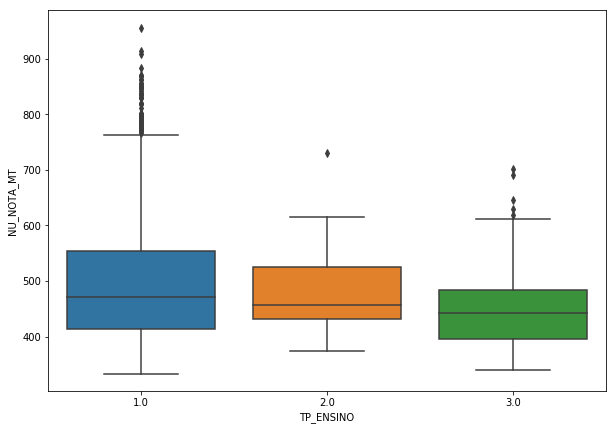

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(x='TP_ENSINO', y ='NU_NOTA_MT', data=train)

In [35]:
train["TP_ENSINO"].value_counts()

1.0    3543
3.0     217
2.0      19
Name: TP_ENSINO, dtype: int64

### Dados IN

0    9071
1    1268
Name: IN_TREINEIRO, dtype: int64

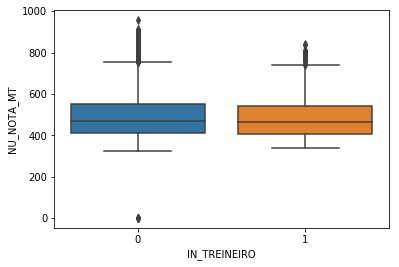

In [36]:
sns.boxplot(x='IN_TREINEIRO', y ='NU_NOTA_MT', data=train)
train['IN_TREINEIRO'].value_counts()

0    10319
1       20
Name: IN_BAIXA_VISAO, dtype: int64

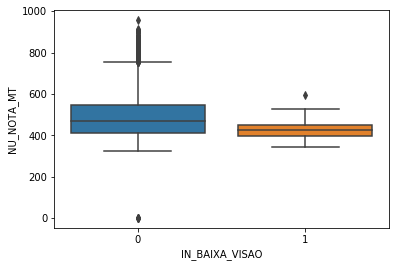

In [37]:
sns.boxplot(x='IN_BAIXA_VISAO', y ='NU_NOTA_MT', data=train)
train['IN_BAIXA_VISAO'].value_counts()

0    10339
Name: IN_CEGUEIRA, dtype: int64

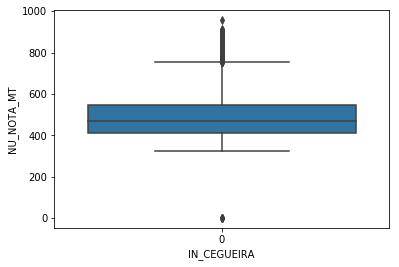

In [38]:
sns.boxplot(x='IN_CEGUEIRA', y ='NU_NOTA_MT', data=train)
train['IN_CEGUEIRA'].value_counts()

0    10336
1        3
Name: IN_SURDEZ, dtype: int64

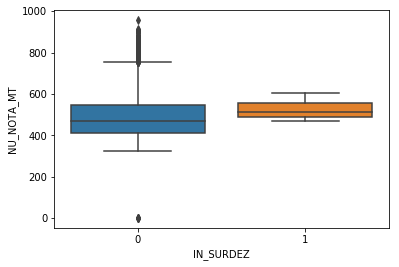

In [39]:
sns.boxplot(x='IN_SURDEZ', y ='NU_NOTA_MT', data=train)
train['IN_SURDEZ'].value_counts()

0    10333
1        6
Name: IN_DISLEXIA, dtype: int64

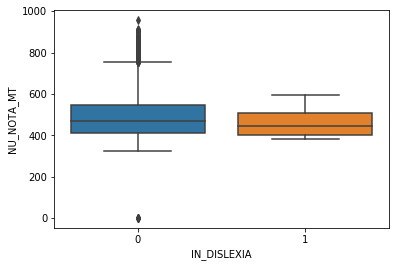

In [40]:
sns.boxplot(x='IN_DISLEXIA', y ='NU_NOTA_MT', data=train)
train['IN_DISLEXIA'].value_counts()

0    10337
1        2
Name: IN_DISCALCULIA, dtype: int64

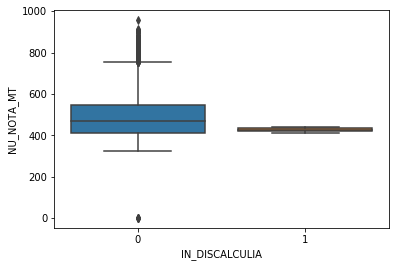

In [41]:
sns.boxplot(x='IN_DISCALCULIA', y ='NU_NOTA_MT', data=train)
train['IN_DISCALCULIA'].value_counts()

0    10257
1       82
Name: IN_SABATISTA, dtype: int64

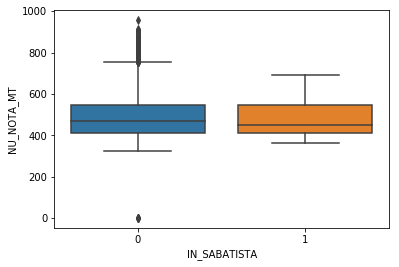

In [42]:
sns.boxplot(x='IN_SABATISTA', y ='NU_NOTA_MT', data=train)
train['IN_SABATISTA'].value_counts()

0    10334
1        5
Name: IN_GESTANTE, dtype: int64

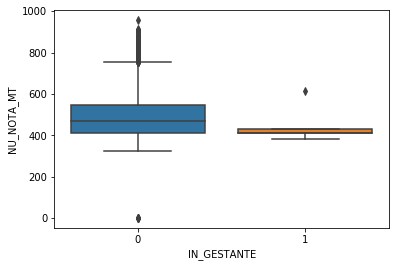

In [43]:
sns.boxplot(x='IN_GESTANTE', y ='NU_NOTA_MT', data=train)
train['IN_GESTANTE'].value_counts()

0    10339
Name: IN_IDOSO, dtype: int64

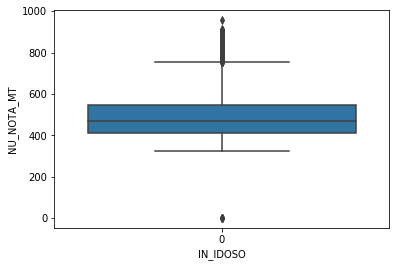

In [44]:
sns.boxplot(x='IN_IDOSO', y ='NU_NOTA_MT', data=train)
train['IN_IDOSO'].value_counts()

# dependência administrativa

2.0    3006
4.0     630
1.0      92
3.0      51
Name: TP_DEPENDENCIA_ADM_ESC, dtype: int64
1 - Federal, 2 - Estadual, 3 - Municipal, 4- Privada


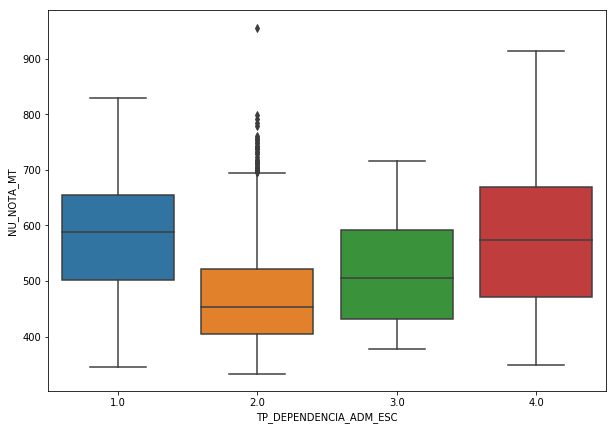

In [45]:
plt.figure(figsize=(10,7))
sns.boxplot(x='TP_DEPENDENCIA_ADM_ESC', y ='NU_NOTA_MT', data=train)
print (train['TP_DEPENDENCIA_ADM_ESC'].value_counts())
print ('1 - Federal, 2 - Estadual, 3 - Municipal, 4- Privada')

### Presença em provas

1    10307
0       30
2        2
Name: TP_PRESENCA_CN, dtype: int64
0 -Faltou à provA, 1-Presente, 2 -Eliminado


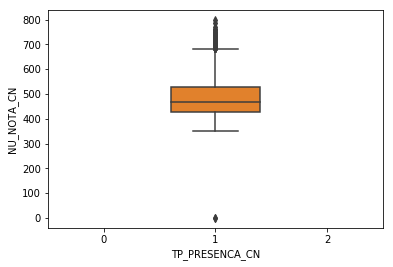

In [46]:
sns.boxplot(x='TP_PRESENCA_CN', y ='NU_NOTA_CN', data=train)
print(train['TP_PRESENCA_CN'].value_counts())
print('0 -Faltou à provA, 1-Presente, 2 -Eliminado')

In [47]:
PRESENCA_CN_0 = train['TP_PRESENCA_CN'] == 0

In [48]:
train[PRESENCA_CN_0].head(100)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
723,b724a88c034b60e2675b042ef4908f97b54de789,35,SP,21,F,1,1,1,4,1,...,540.0,H,H,B,A,B,B,F,A,662.8
820,0aee09b9a447f03b12a35c457adecd9d72e9a700,35,SP,17,F,1,1,2,0,2,...,560.0,D,B,G,B,B,A,NaN,A,464.8
1107,78fa203cd00d868e78fd7eae1f8a18bdd65c14c7,23,CE,18,F,1,1,2,0,2,...,440.0,D,E,C,A,A,A,NaN,A,383.5
1158,5ad31f80676f8c179fa1f32544c685b1e8c088f0,51,MT,26,M,2,1,1,4,1,...,400.0,E,C,B,A,A,B,A,A,490.2
1348,ca01b27b122d35d8e9f750a6c99373eb1932a5f3,21,MA,20,M,2,1,2,0,2,...,440.0,C,C,B,A,A,B,C,A,402.8
1455,7d02fe7f5d94fedeb4bd3f2b2e0a0aa6d82ee358,33,RJ,20,M,1,2,2,0,2,...,280.0,H,H,A,B,B,A,NaN,A,439.4
1769,f16a318b94df4a4ee34b9b56999322541c40838a,35,SP,17,M,1,1,2,0,3,...,580.0,B,E,F,B,B,A,NaN,E,660.7
1890,73ba07ec9af6b98d16c0a786063f550097f3fe11,23,CE,17,M,3,2,3,0,1,...,180.0,B,C,B,B,B,B,C,A,362.3
2319,abc7d8fd9afa5120875d56d37cd186175e814b1f,23,CE,18,M,3,2,2,0,2,...,440.0,B,E,B,B,B,B,E,A,490.2
5117,000029420de90469eb606995dc4db87fc33dc450,42,SC,18,F,1,1,2,0,2,...,660.0,C,E,C,A,A,A,NaN,A,353.5


1    10307
0       30
2        2
Name: TP_PRESENCA_CH, dtype: int64

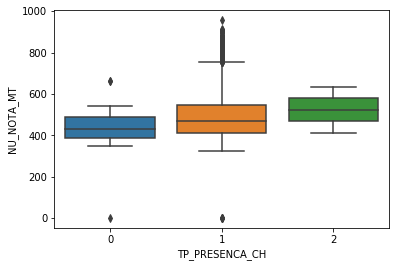

In [49]:
sns.boxplot(x='TP_PRESENCA_CH', y ='NU_NOTA_MT', data=train)
train['TP_PRESENCA_CH'].value_counts()

1    10339
Name: TP_PRESENCA_LC, dtype: int64

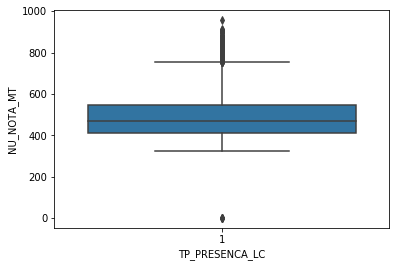

In [50]:
sns.boxplot(x='TP_PRESENCA_LC', y ='NU_NOTA_MT', data=train)
train['TP_PRESENCA_LC'].value_counts()

### Cor da prova

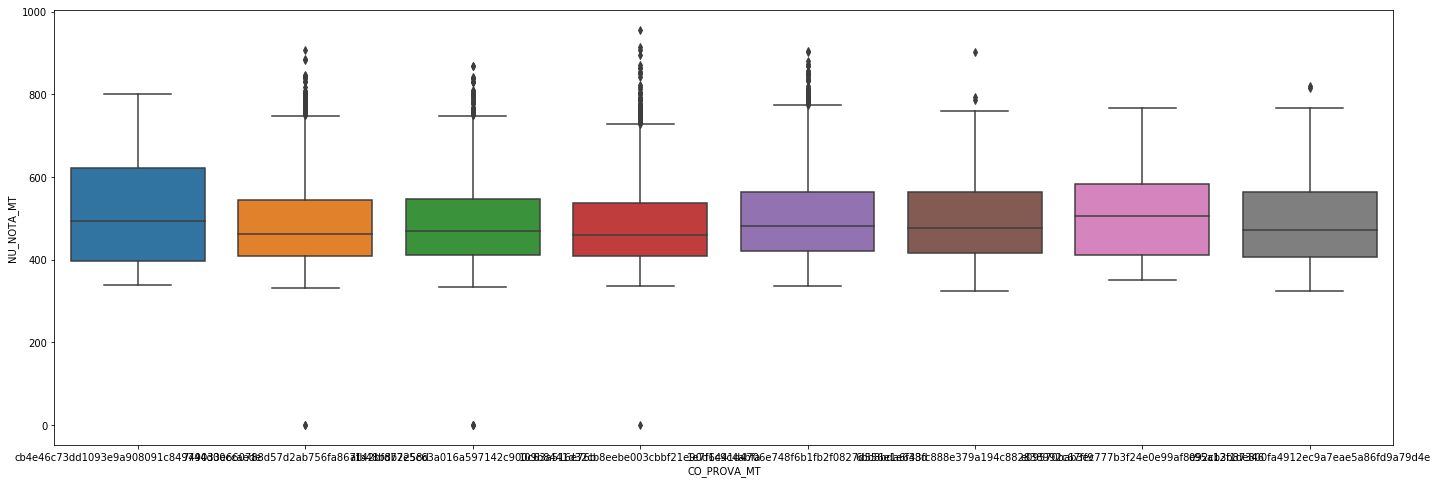

In [51]:
plt.figure(figsize=(24,8))
sns.boxplot(x='CO_PROVA_MT', y ='NU_NOTA_MT', data=train)

In [52]:
train["CO_PROVA_MT"].value_counts()

109b8441d32cb8eebe003cbbf21e90d1c9c4abfa    2586
a142bfd77e5c63a016a597142c900c63a516e76b    2530
1e7f6441d4706e748f6b1fb2f0827d556e1e638d    2475
749033e660788d57d2ab756fa867fb48b8b2258d    2461
6bb8bda6f43fc888e379a194c882838992c67ff9      80
cb4e46c73dd1093e9a908091c849744d00ccaede      73
095a12f1de800fa4912ec9a7eae5a86fd9a79d4e      70
e09570bab3ec777b3f24e0e99af8e92cb3b87346      64
Name: CO_PROVA_MT, dtype: int64

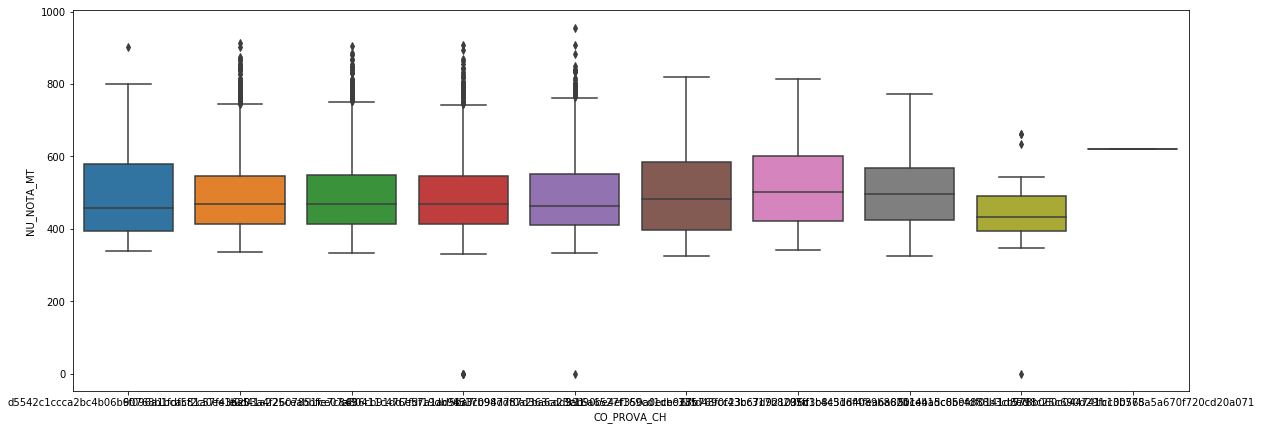

In [53]:
plt.figure(figsize=(20,7))
sns.boxplot(x='CO_PROVA_CH', y ='NU_NOTA_MT', data=train)

### Nota nas outras provas

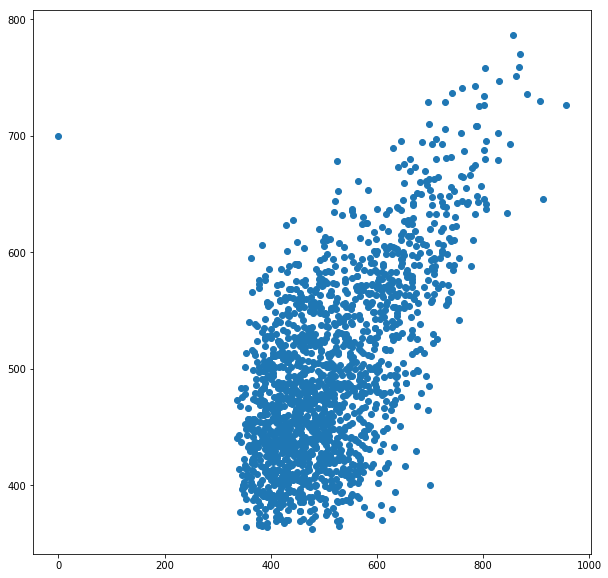

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(train["NU_NOTA_MT"][train["SG_UF_RESIDENCIA"] == "SP"], train["NU_NOTA_CN"][train["SG_UF_RESIDENCIA"] == "SP"])

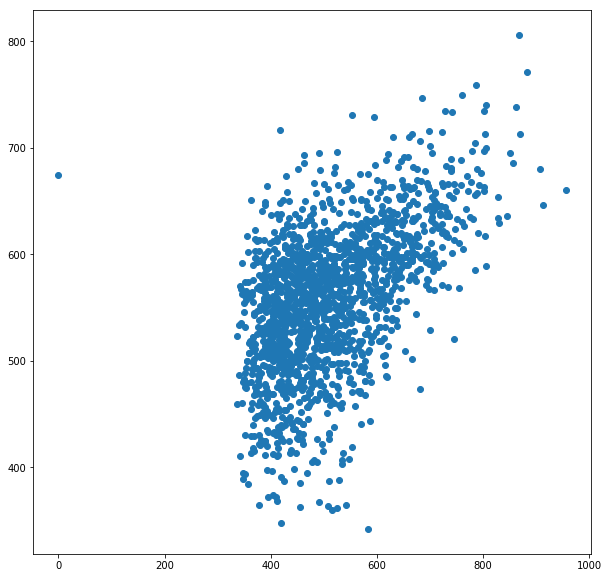

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(train["NU_NOTA_MT"][train["SG_UF_RESIDENCIA"] == "SP"], train["NU_NOTA_CH"][train["SG_UF_RESIDENCIA"] == "SP"])

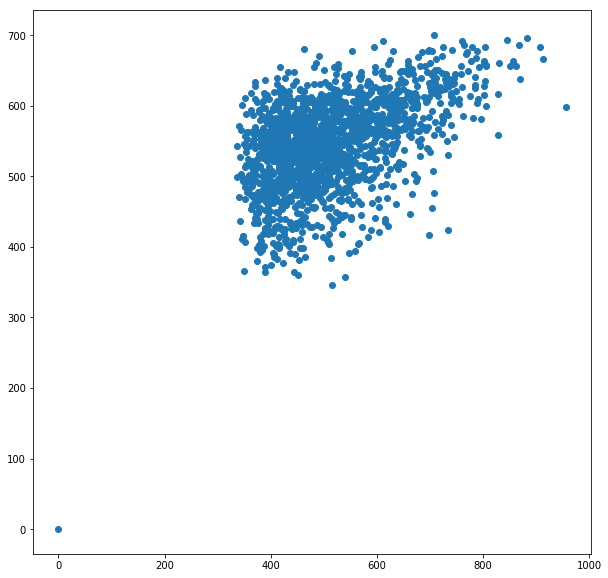

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(train["NU_NOTA_MT"][train["SG_UF_RESIDENCIA"] == "SP"], train["NU_NOTA_LC"][train["SG_UF_RESIDENCIA"] == "SP"])

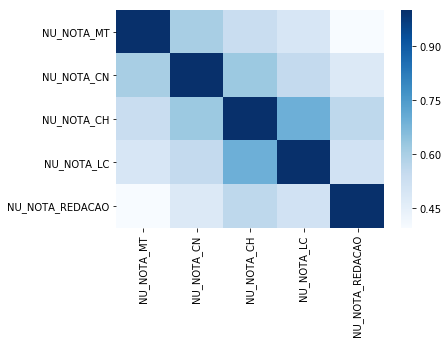

In [57]:
df = train[["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]]
sns.heatmap(df.corr(), cmap ="Blues" )

### Língua

1    5893
0    4446
Name: TP_LINGUA, dtype: int64

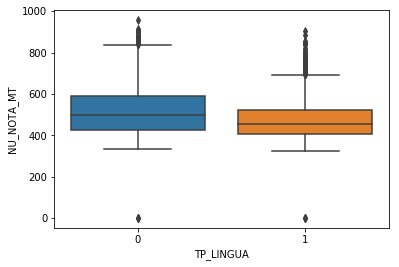

In [58]:
sns.boxplot(x='TP_LINGUA', y ='NU_NOTA_MT', data=train)
train['TP_LINGUA'].value_counts()

### Redação

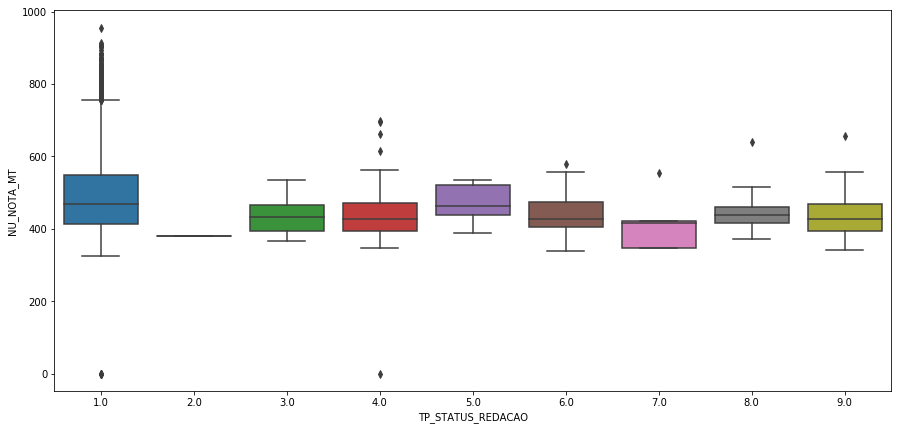

In [59]:
plt.figure(figsize=(15,7))
sns.boxplot(x='TP_STATUS_REDACAO', y ='NU_NOTA_MT', data=train)

In [60]:
train["TP_STATUS_REDACAO"].value_counts()

1.0    10165
6.0       58
4.0       55
9.0       19
3.0       18
8.0       11
5.0        7
7.0        5
2.0        1
Name: TP_STATUS_REDACAO, dtype: int64

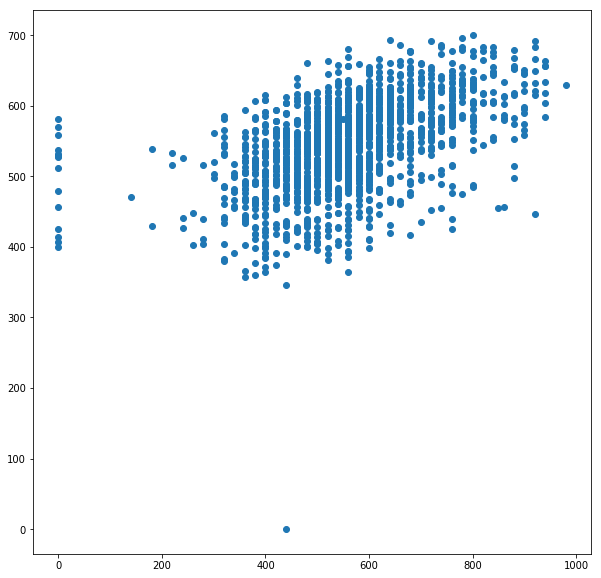

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(train["NU_NOTA_REDACAO"][train["SG_UF_RESIDENCIA"] == "SP"], train["NU_NOTA_LC"][train["SG_UF_RESIDENCIA"] == "SP"])

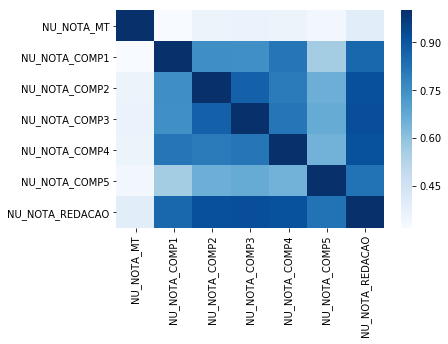

In [62]:
df = train[["NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO"]]
sns.heatmap(df.corr(), cmap ="Blues" )

### Questões socieconômicas

Edução pai
E    2663
B    2217
C    1589
D    1331
H     996
F     653
A     535
G     355
Name: Q001, dtype: int64


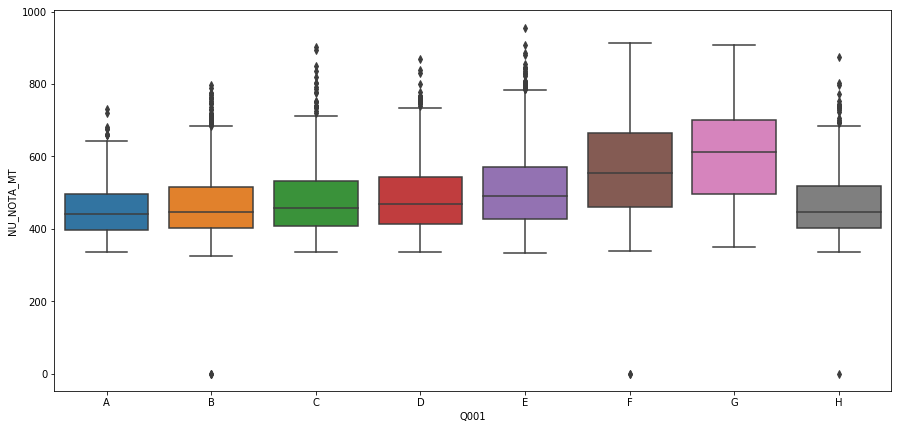

In [63]:
print("Edução pai")
print(train["Q001"].value_counts())
plt.figure(figsize=(15,7))
sns.boxplot(x='Q001', y ='NU_NOTA_MT', data=train, order = ["A", "B","C", "D", "E", "F", "G", "H"] )

Edução mãe
E    2663
B    2217
C    1589
D    1331
H     996
F     653
A     535
G     355
Name: Q001, dtype: int64


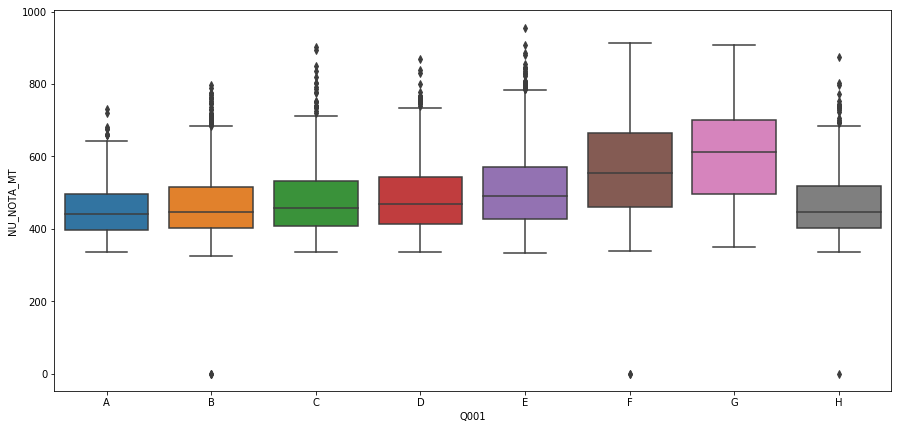

In [64]:
print("Edução mãe")
print(train["Q001"].value_counts())
plt.figure(figsize=(15,7))
sns.boxplot(x='Q001', y ='NU_NOTA_MT', data=train, order = ["A", "B","C", "D", "E", "F", "G", "H"])

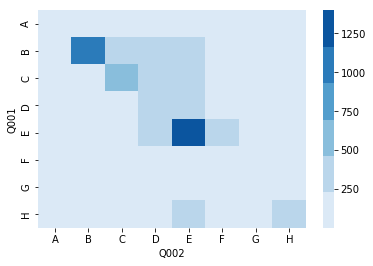

In [65]:
pt = pd.pivot_table(train, values = "NU_INSCRICAO", index="Q001", columns = "Q002", aggfunc="count")
sns.heatmap(pt,cmap = sns.color_palette("Blues"))

Renda Familiar
B    2762
C    2602
D    1309
E     891
F     579
G     554
H     377
A     323
I     235
J     145
N     106
K      97
Q      95
O      84
L      68
M      58
P      54
Name: Q006, dtype: int64


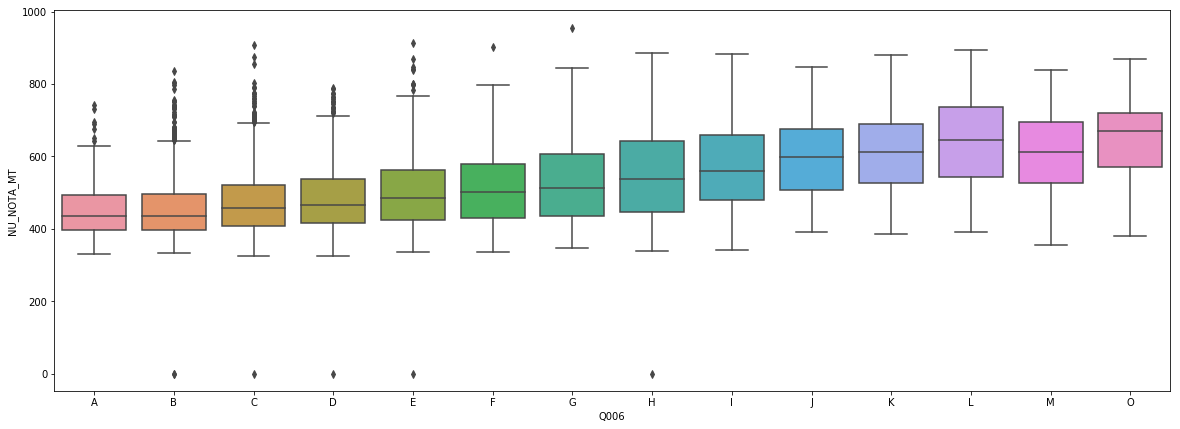

In [66]:
print("Renda Familiar")
print(train["Q006"].value_counts())
plt.figure(figsize=(20,7))
sns.boxplot(x='Q006', y ='NU_NOTA_MT', data=train, order = ["A", "B","C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "O"])

Número de computadores
B    5355
A    3769
C     833
D     283
E      99
Name: Q024, dtype: int64


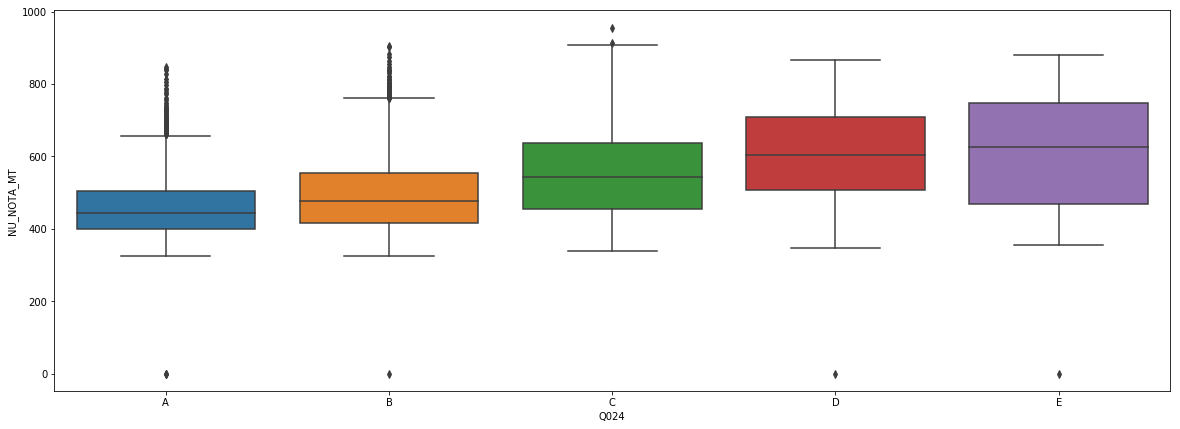

In [67]:
print("Número de computadores")
print(train["Q024"].value_counts())
plt.figure(figsize=(20,7))
sns.boxplot(x='Q024', y ='NU_NOTA_MT', data=train, order = ["A", "B","C", "D", "E"])

Possui internet
B    6846
A    3493
Name: Q025, dtype: int64


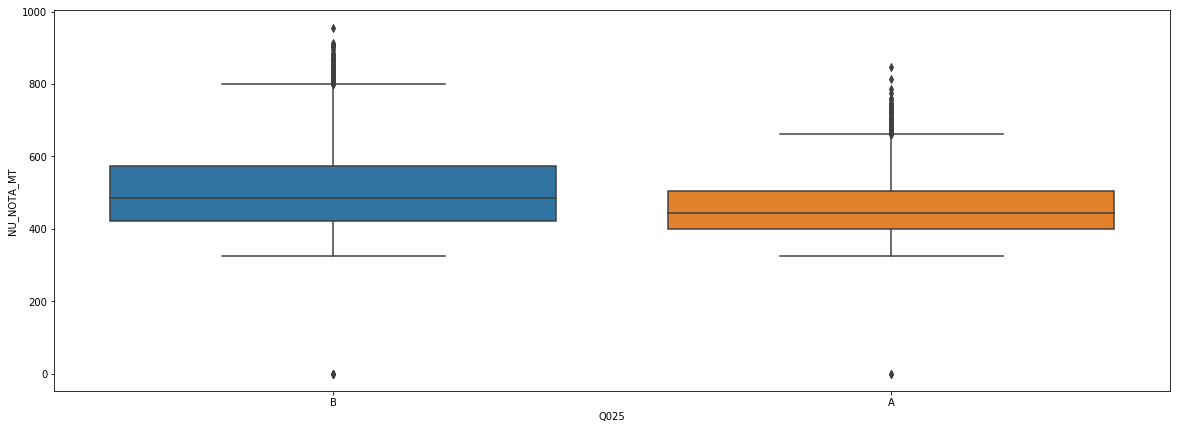

In [68]:
print("Possui internet")
print(train["Q025"].value_counts())
plt.figure(figsize=(20,7))
sns.boxplot(x='Q025', y ='NU_NOTA_MT', data=train)

Já trabalhou/trabalha
A    5906
B    2458
C    1975
Name: Q026, dtype: int64


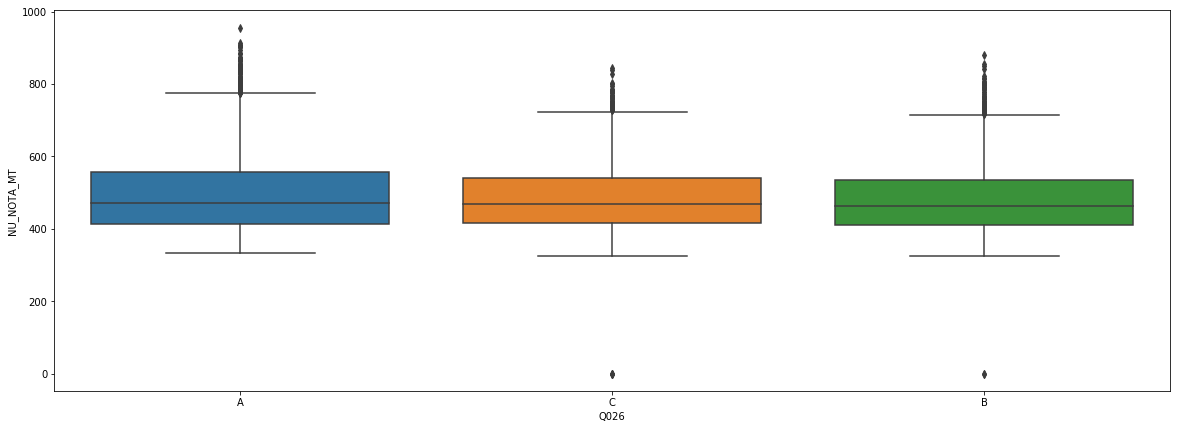

In [69]:
print("Já trabalhou/trabalha")
print(train["Q026"].value_counts())
plt.figure(figsize=(20,7))
sns.boxplot(x='Q026', y ='NU_NOTA_MT', data=train)

Quanto tempo trabalha
D    915
F    759
E    574
C    563
B    517
A    284
G    271
H    152
I    100
M     88
J     50
K     32
L     20
Name: Q027, dtype: int64


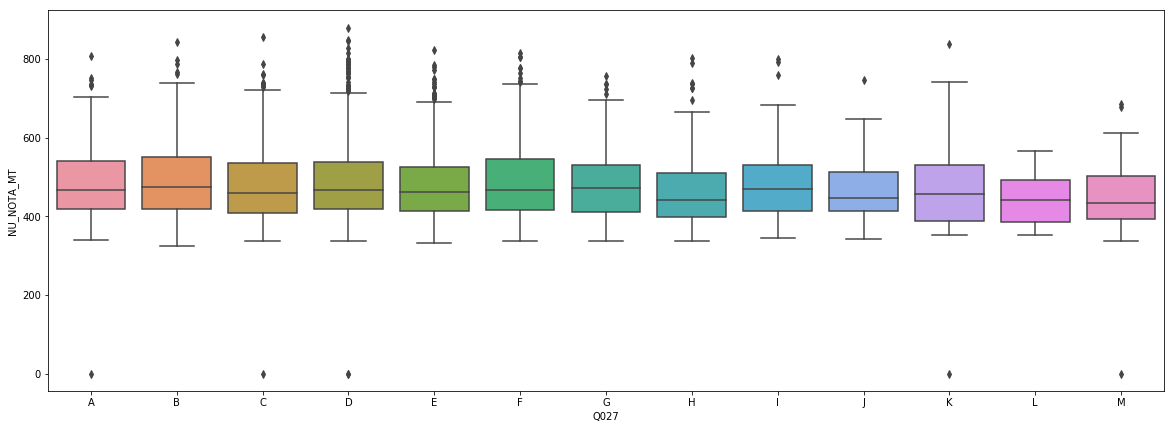

In [70]:
print("Quanto tempo trabalha")
print(train["Q027"].value_counts())
plt.figure(figsize=(20,7))
sns.boxplot(x='Q027', y ='NU_NOTA_MT', data=train, order = ["A", "B","C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M"])

Tipo de escola
A    8429
D    1221
E     273
B     270
C     146
Name: Q047, dtype: int64


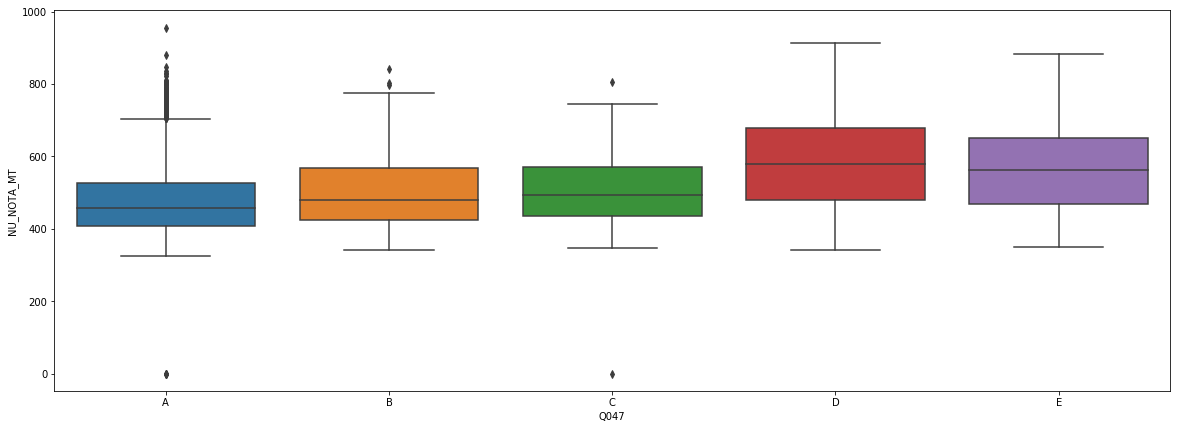

In [71]:
print("Tipo de escola")
print(train["Q047"].value_counts())
plt.figure(figsize=(20,7))
sns.boxplot(x='Q047', y ='NU_NOTA_MT', data=train, order = ["A", "B","C", "D", "E"])

In [72]:
pd.set_option('display.max_columns', 200)

In [73]:
pd.set_option('display.max_rows', 200)

## Tratamento variáveis training data

In [74]:
trainf = train.copy()

In [75]:
trainf1 = trainf.copy()

# CO_UF_RESIDENCIA
trainf1.drop("CO_UF_RESIDENCIA", axis = 1, inplace = True)

# SG_UF_RESIDENCIA
df = pd.get_dummies(trainf1["SG_UF_RESIDENCIA"], drop_first = True)
trainf1.drop("SG_UF_RESIDENCIA", axis = 1, inplace = True) 
trainf1 = pd.concat([trainf1, df], axis =1)

# NU_IDADE - variável numérica

# TP_SEXO
def sexo(sexo):
    if sexo == "F":
        return 1
    else:
        return 0
trainf1["TP_SEXO_T"] = trainf1["TP_SEXO"].apply(sexo)
trainf1.drop("TP_SEXO", axis = 1, inplace = True) 

# TP_COR_RACA

df1 = pd.get_dummies(trainf1["TP_COR_RACA"], drop_first = True, prefix= 'COR')
trainf1.drop("TP_COR_RACA", axis = 1, inplace = True) 
trainf1 = pd.concat([trainf1, df1], axis =1)

# TP_NACIONALIDADE
df2 = pd.get_dummies(trainf1["TP_NACIONALIDADE"], drop_first = True, prefix= 'NAC')
trainf1.drop("TP_NACIONALIDADE", axis = 1, inplace = True) 
trainf1 = pd.concat([trainf1, df2], axis =1)

# TP_ST_CONCLUSAO
df3 = pd.get_dummies(trainf1["TP_ST_CONCLUSAO"], drop_first = True, prefix= 'CONC')
trainf1.drop("TP_ST_CONCLUSAO", axis = 1, inplace = True) 
trainf1 = pd.concat([trainf1, df3], axis =1)

# TP_ANO_CONCLUIU
df4 = pd.get_dummies(trainf1["TP_ANO_CONCLUIU"], drop_first = True, prefix= 'ANO')
trainf1.drop("TP_ANO_CONCLUIU", axis = 1, inplace = True) 
trainf1 = pd.concat([trainf1, df4], axis =1)

# TP_ESCOLA
df5 = pd.get_dummies(trainf1["TP_ESCOLA"], drop_first = True, prefix= 'ESC')
trainf1.drop("TP_ESCOLA", axis = 1, inplace = True) 
trainf1 = pd.concat([trainf1, df5], axis =1)

# TP_ENSINO
trainf1.drop("TP_ENSINO", axis = 1, inplace = True)

# IN_TREINEIRO
trainf1["IN_TREINEIRO"] = trainf1["IN_TREINEIRO"].astype("uint8")

# TP_DEPENDENCIA_ADM_ESC
trainf1.drop("TP_DEPENDENCIA_ADM_ESC", axis = 1, inplace = True)

# IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DISLEXIA, IN_DISCALCULIA, IN_SABATISTA, IN_GESTANTE, IN_IDOSO
trainf1 = trainf1.drop(["IN_BAIXA_VISAO", "IN_CEGUEIRA", "IN_SURDEZ", "IN_DISLEXIA", "IN_DISCALCULIA", "IN_IDOSO"], axis =1)
trainf1["IN_SABATISTA"] = trainf1["IN_SABATISTA"].astype("uint8")
trainf1["IN_GESTANTE"] = trainf1["IN_GESTANTE"].astype("uint8")

#TP_PRESENCA_CN
PRESENCA_CN_0 = trainf1['TP_PRESENCA_CN'] == 0
PRESENCA_CN_2 = trainf1['TP_PRESENCA_CN'] == 2
trainf1['NU_NOTA_CN'][PRESENCA_CN_0] = 0
trainf1['NU_NOTA_CN'][PRESENCA_CN_2] = 0
trainf1.drop("TP_PRESENCA_CN", axis = 1, inplace = True)

# TP_PRESENCA_CH
PRESENCA_CH_0 = trainf1['TP_PRESENCA_CH'] == 0
PRESENCA_CH_2 = trainf1['TP_PRESENCA_CH'] == 2
trainf1['NU_NOTA_CH'][PRESENCA_CH_0] = 0
trainf1['NU_NOTA_CH'][PRESENCA_CH_2] = 0
trainf1.drop("TP_PRESENCA_CH", axis = 1, inplace = True)

# TP_PRESENCA_LC
PRESENCA_LC_0 = trainf1['TP_PRESENCA_LC'] == 0
trainf1['NU_NOTA_LC'][PRESENCA_LC_0] = 0
trainf1.drop("TP_PRESENCA_LC", axis = 1, inplace = True)

# CO_PROVA_CN, CO_PROVA_CH, CO_PROVA_LC, CO_PROVA_MT
trainf1 = trainf1.drop(["CO_PROVA_CN", "CO_PROVA_CH", "CO_PROVA_LC", "CO_PROVA_MT"], axis =1)

# NU_NOTA_CN



# NU_NOTA_CH


# NU_NOTA_LC

# TP_LINGUA


# TP_STATUS_REDACAO
df10 = pd.get_dummies(trainf1["TP_STATUS_REDACAO"], drop_first = True, prefix= 'RED')
trainf1.drop("TP_STATUS_REDACAO", axis = 1, inplace = True)
trainf1 = pd.concat([trainf1, df10], axis =1)

# NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5
trainf1 = trainf1.drop(["NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"], axis =1)

# NU_NOTA_REDACAO

# Q001 (EDUCAÇÃO DO PAI)
df11 = pd.get_dummies(trainf1["Q001"], drop_first = True, prefix= 'PAI')
trainf1.drop("Q001", axis = 1, inplace = True)
trainf1 = pd.concat([trainf1, df11], axis =1)

# Q002 (EDUCAÇÃO DA MAE)
df12 = pd.get_dummies(trainf1["Q002"], drop_first = True, prefix= 'MAE')
trainf1.drop("Q002", axis = 1, inplace = True)
trainf1 = pd.concat([trainf1, df12], axis =1)

# Q006 (RENDA FAMILIAR)
df13 = pd.get_dummies(trainf1["Q006"], drop_first = True, prefix= 'REND')
trainf1.drop("Q006", axis = 1, inplace = True)
trainf1 = pd.concat([trainf1, df13], axis =1)

# Q024 (NUMERO DE COMPUTADORES)
df14 = pd.get_dummies(trainf1["Q024"], drop_first = True, prefix= 'N_PC')
trainf1.drop("Q024", axis = 1, inplace = True)
trainf1 = pd.concat([trainf1, df14], axis =1)

#Q025
trainf1['Q025'] = trainf1['Q025'].replace({"A": 0, "B": 1})

# Q026
df15 = pd.get_dummies(trainf1["Q026"], drop_first = True, prefix= 'TRAB')
trainf1.drop("Q026", axis = 1, inplace = True)
trainf1 = pd.concat([trainf1, df15], axis =1)

# Q027
trainf1.drop("Q027", axis = 1, inplace = True)

# Q047  
df17 = pd.get_dummies(trainf1["Q047"], drop_first = True, prefix= 'EM')
trainf1.drop("Q047", axis = 1, inplace = True)
trainf1 = pd.concat([trainf1, df17], axis =1)

trainf1.head()

C:\Users\Marte\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marte\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marte\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marte\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,NU_INSCRICAO,NU_IDADE,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025,NU_NOTA_MT,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,TP_SEXO_T,COR_1,COR_2,COR_3,COR_4,COR_5,NAC_1,NAC_2,NAC_3,NAC_4,CONC_2,CONC_3,CONC_4,ANO_1,ANO_2,ANO_3,ANO_4,ANO_5,ANO_6,ANO_7,ANO_8,ANO_9,ANO_10,ESC_2,ESC_3,RED_2.0,RED_3.0,RED_4.0,RED_5.0,RED_6.0,RED_7.0,RED_8.0,RED_9.0,PAI_B,PAI_C,PAI_D,PAI_E,PAI_F,PAI_G,PAI_H,MAE_B,MAE_C,MAE_D,MAE_E,MAE_F,MAE_G,MAE_H,REND_B,REND_C,REND_D,REND_E,REND_F,REND_G,REND_H,REND_I,REND_J,REND_K,REND_L,REND_M,REND_N,REND_O,REND_P,REND_Q,N_PC_B,N_PC_C,N_PC_D,N_PC_E,TRAB_B,TRAB_C,EM_B,EM_C,EM_D,EM_E
0,5f1dbdc5bcb5f346d3589b50d1866c96414ff5a3,18,0,0,0,490.1,598.1,577.0,1,580.0,1,513.2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,e32d6ef30781c32abfde7deb8073630defd2f487,18,0,0,0,435.8,578.5,599.8,0,680.0,1,527.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,8b6337d6e88ac810d17c96fdfb8099963d527ad3,21,0,0,0,505.7,483.7,454.6,1,380.0,1,547.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,97dcc7d0efe37a660c86c231ed71def383308262,17,0,0,0,468.9,577.7,561.7,1,680.0,1,403.8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,7abda9d4d778b7f7f6d3ae54f991cb9e3855c300,35,0,0,0,440.5,584.9,570.5,1,560.0,0,483.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [76]:
trainf1.isnull().any()

NU_INSCRICAO       False
NU_IDADE           False
IN_TREINEIRO       False
IN_SABATISTA       False
IN_GESTANTE        False
NU_NOTA_CN         False
NU_NOTA_CH         False
NU_NOTA_LC         False
TP_LINGUA          False
NU_NOTA_REDACAO    False
Q025               False
NU_NOTA_MT         False
AL                 False
AM                 False
AP                 False
BA                 False
CE                 False
DF                 False
ES                 False
GO                 False
MA                 False
MG                 False
MS                 False
MT                 False
PA                 False
PB                 False
PE                 False
PI                 False
PR                 False
RJ                 False
RN                 False
RO                 False
RR                 False
RS                 False
SC                 False
SE                 False
SP                 False
TO                 False
TP_SEXO_T          False
COR_1              False


In [77]:
trainf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10339 entries, 0 to 13548
Columns: 111 entries, NU_INSCRICAO to EM_E
dtypes: float64(5), int64(4), object(1), uint8(101)
memory usage: 1.9+ MB


In [78]:
trainf1[trainf1['NU_NOTA_MT'] == 0]

,NU_INSCRICAO,NU_IDADE,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025,NU_NOTA_MT,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,TP_SEXO_T,COR_1,COR_2,COR_3,COR_4,COR_5,NAC_1,NAC_2,NAC_3,NAC_4,CONC_2,CONC_3,CONC_4,ANO_1,ANO_2,ANO_3,ANO_4,ANO_5,ANO_6,ANO_7,ANO_8,ANO_9,ANO_10,ESC_2,ESC_3,RED_2.0,RED_3.0,RED_4.0,RED_5.0,RED_6.0,RED_7.0,RED_8.0,RED_9.0,PAI_B,PAI_C,PAI_D,PAI_E,PAI_F,PAI_G,PAI_H,MAE_B,MAE_C,MAE_D,MAE_E,MAE_F,MAE_G,MAE_H,REND_B,REND_C,REND_D,REND_E,REND_F,REND_G,REND_H,REND_I,REND_J,REND_K,REND_L,REND_M,REND_N,REND_O,REND_P,REND_Q,N_PC_B,N_PC_C,N_PC_D,N_PC_E,TRAB_B,TRAB_C,EM_B,EM_C,EM_D,EM_E
432,483edce66a4028e218eba51bd7d1159a8e06e2d1,30,0,0,0,464.3,554.5,0.0,0,500.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5408,032c4a21f3a2307d0e5391fa8e06b0185037dbe4,20,0,0,0,467.6,508.5,0.0,0,480.0,1,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7726,114ed037d9dcbdf7819501f6d91e94b8d2de5e77,30,0,0,0,0.0,0.0,427.4,1,420.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10098,354476a97ee466854e0d3da9462d8048391a9de3,29,0,0,0,508.1,459.7,0.0,1,0.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10323,e427322d03dc41d79e6d6471211d2a9f2ff4149f,32,0,0,0,699.5,675.0,0.0,0,440.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
13300,84e50b477d029a3f18c92f55a60cdeb1c2a45630,24,0,0,0,436.9,505.7,0.0,1,440.0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [79]:
trainf1 = trainf1.drop([432,5408,7726,10098,10323,13300], axis=0)

In [80]:
df = trainf1.copy()

In [81]:
df.head()

,NU_INSCRICAO,NU_IDADE,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025,NU_NOTA_MT,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,TP_SEXO_T,COR_1,COR_2,COR_3,COR_4,COR_5,NAC_1,NAC_2,NAC_3,NAC_4,CONC_2,CONC_3,CONC_4,ANO_1,ANO_2,ANO_3,ANO_4,ANO_5,ANO_6,ANO_7,ANO_8,ANO_9,ANO_10,ESC_2,ESC_3,RED_2.0,RED_3.0,RED_4.0,RED_5.0,RED_6.0,RED_7.0,RED_8.0,RED_9.0,PAI_B,PAI_C,PAI_D,PAI_E,PAI_F,PAI_G,PAI_H,MAE_B,MAE_C,MAE_D,MAE_E,MAE_F,MAE_G,MAE_H,REND_B,REND_C,REND_D,REND_E,REND_F,REND_G,REND_H,REND_I,REND_J,REND_K,REND_L,REND_M,REND_N,REND_O,REND_P,REND_Q,N_PC_B,N_PC_C,N_PC_D,N_PC_E,TRAB_B,TRAB_C,EM_B,EM_C,EM_D,EM_E
0,5f1dbdc5bcb5f346d3589b50d1866c96414ff5a3,18,0,0,0,490.1,598.1,577.0,1,580.0,1,513.2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,e32d6ef30781c32abfde7deb8073630defd2f487,18,0,0,0,435.8,578.5,599.8,0,680.0,1,527.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,8b6337d6e88ac810d17c96fdfb8099963d527ad3,21,0,0,0,505.7,483.7,454.6,1,380.0,1,547.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,97dcc7d0efe37a660c86c231ed71def383308262,17,0,0,0,468.9,577.7,561.7,1,680.0,1,403.8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,7abda9d4d778b7f7f6d3ae54f991cb9e3855c300,35,0,0,0,440.5,584.9,570.5,1,560.0,0,483.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


# Tratamento predict - test data

In [82]:
pred1 = predict.copy()

# CO_UF_RESIDENCIA
pred1.drop("CO_UF_RESIDENCIA", axis = 1, inplace = True)

# SG_UF_RESIDENCIA
df0 = pd.get_dummies(pred1["SG_UF_RESIDENCIA"], drop_first = True)
pred1.drop("SG_UF_RESIDENCIA", axis = 1, inplace = True) 
pred1 = pd.concat([pred1, df0], axis =1)

# NU_IDADE - variável numérica

# TP_SEXO
def sexo(sexo):
    if sexo == "F":
        return 1
    else:
        return 0
pred1["TP_SEXO_T"] = pred1["TP_SEXO"].apply(sexo)
pred1.drop("TP_SEXO", axis = 1, inplace = True) 

# TP_COR_RACA

df1 = pd.get_dummies(pred1["TP_COR_RACA"], drop_first = True, prefix= 'COR')
pred1.drop("TP_COR_RACA", axis = 1, inplace = True) 
pred1 = pd.concat([pred1, df1], axis =1)

# TP_NACIONALIDADE
df2 = pd.get_dummies(pred1["TP_NACIONALIDADE"], drop_first = True, prefix= 'NAC')
pred1.drop("TP_NACIONALIDADE", axis = 1, inplace = True) 
pred1 = pd.concat([pred1, df2], axis =1)

# TP_ST_CONCLUSAO
df3 = pd.get_dummies(pred1["TP_ST_CONCLUSAO"], drop_first = True, prefix= 'CONC')
pred1.drop("TP_ST_CONCLUSAO", axis = 1, inplace = True) 
pred1 = pd.concat([pred1, df3], axis =1)

# TP_ANO_CONCLUIU
df4 = pd.get_dummies(pred1["TP_ANO_CONCLUIU"], drop_first = True, prefix= 'ANO')
pred1.drop("TP_ANO_CONCLUIU", axis = 1, inplace = True) 
pred1 = pd.concat([pred1, df4], axis =1)

# TP_ESCOLA
df5 = pd.get_dummies(pred1["TP_ESCOLA"], drop_first = True, prefix= 'ESC')
pred1.drop("TP_ESCOLA", axis = 1, inplace = True) 
pred1 = pd.concat([pred1, df5], axis =1)

# TP_ENSINO
pred1.drop("TP_ENSINO", axis = 1, inplace = True)

# IN_TREINEIRO
pred1["IN_TREINEIRO"] = pred1["IN_TREINEIRO"].astype("uint8")

# TP_DEPENDENCIA_ADM_ESC
pred1.drop("TP_DEPENDENCIA_ADM_ESC", axis = 1, inplace = True)

# IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DISLEXIA, IN_DISCALCULIA, IN_SABATISTA, IN_GESTANTE, IN_IDOSO
pred1 = pred1.drop(["IN_BAIXA_VISAO", "IN_CEGUEIRA", "IN_SURDEZ", "IN_DISLEXIA", "IN_DISCALCULIA", "IN_IDOSO"], axis =1)
pred1["IN_SABATISTA"] = pred1["IN_SABATISTA"].astype("uint8")
pred1["IN_GESTANTE"] = pred1["IN_GESTANTE"].astype("uint8")

#TP_PRESENCA_CN
PRESENCA_CN_0 = pred1['TP_PRESENCA_CN'] == 0
pred1['NU_NOTA_CN'][PRESENCA_CN_0] = 0
pred1.drop("TP_PRESENCA_CN", axis = 1, inplace = True)

# TP_PRESENCA_CH
PRESENCA_CH_0 = pred1['TP_PRESENCA_CH'] == 0
pred1['NU_NOTA_CH'][PRESENCA_CH_0] = 0
pred1.drop("TP_PRESENCA_CH", axis = 1, inplace = True)

# TP_PRESENCA_LC
PRESENCA_LC_0 = pred1['TP_PRESENCA_LC'] == 0
PRESENCA_LC_2 = pred1['TP_PRESENCA_LC'] == 2
pred1['NU_NOTA_LC'][PRESENCA_LC_0] = 0
pred1['NU_NOTA_LC'][PRESENCA_LC_2] = 0
pred1['NU_NOTA_REDACAO'][PRESENCA_LC_0] = 0
pred1['NU_NOTA_REDACAO'][PRESENCA_LC_2] = 0
#pred1.drop("TP_PRESENCA_LC", axis = 1, inplace = True)

# CO_PROVA_CN, CO_PROVA_CH, CO_PROVA_LC, CO_PROVA_MT
pred1 = pred1.drop(["CO_PROVA_CN", "CO_PROVA_CH", "CO_PROVA_LC", "CO_PROVA_MT"], axis =1)

# NU_NOTA_CN


# NU_NOTA_CH


# NU_NOTA_LC

# TP_LINGUA
pred1["TP_LINGUA"] = pred1["TP_LINGUA"].astype("uint8")

# TP_STATUS_REDACAO
pred1['TP_STATUS_REDACAO'].fillna(1.0)
df10 = pd.get_dummies(pred1["TP_STATUS_REDACAO"], drop_first = True, prefix= 'RED')
pred1.drop("TP_STATUS_REDACAO", axis = 1, inplace = True)
pred1 = pd.concat([pred1, df10], axis =1)
pred1['RED_7.0'] = 0

# NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5
pred1 = pred1.drop(["NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"], axis =1)

# NU_NOTA_REDACAO

# Q001 (EDUCAÇÃO DO PAI)
df11 = pd.get_dummies(pred1["Q001"], drop_first = True, prefix= 'PAI')
pred1.drop("Q001", axis = 1, inplace = True)
pred1 = pd.concat([pred1, df11], axis =1)

# Q002 (EDUCAÇÃO DA MAE)
df12 = pd.get_dummies(pred1["Q002"], drop_first = True, prefix= 'MAE')
pred1.drop("Q002", axis = 1, inplace = True)
pred1 = pd.concat([pred1, df12], axis =1)

# Q006 (RENDA FAMILIAR)
df13 = pd.get_dummies(pred1["Q006"], drop_first = True, prefix= 'REND')
pred1.drop("Q006", axis = 1, inplace = True)
pred1 = pd.concat([pred1, df13], axis =1)

# Q024 (NUMERO DE COMPUTADORES)
df14 = pd.get_dummies(pred1["Q024"], drop_first = True, prefix= 'N_PC')
pred1.drop("Q024", axis = 1, inplace = True)
pred1 = pd.concat([pred1, df14], axis =1)

#Q025
pred1['Q025'] = pred1['Q025'].replace({"A": 0, "B": 1})

# Q026
df15 = pd.get_dummies(pred1["Q026"], drop_first = True, prefix= 'TRAB')
pred1.drop("Q026", axis = 1, inplace = True)
pred1 = pd.concat([pred1, df15], axis =1)

# Q027
pred1.drop("Q027", axis = 1, inplace = True)

# Q047  
df17 = pd.get_dummies(pred1["Q047"], drop_first = True, prefix= 'EM')
pred1.drop("Q047", axis = 1, inplace = True)
pred1 = pd.concat([pred1, df17], axis =1)

pred1.head()

C:\Users\Marte\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marte\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marte\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marte\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,NU_INSCRICAO,NU_IDADE,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,TP_SEXO_T,COR_1,COR_2,COR_3,COR_4,COR_5,NAC_1,NAC_2,NAC_3,NAC_4,CONC_2,CONC_3,CONC_4,ANO_1,ANO_2,ANO_3,ANO_4,ANO_5,ANO_6,ANO_7,ANO_8,ANO_9,ANO_10,ESC_2,ESC_3,RED_2.0,RED_3.0,RED_4.0,RED_5.0,RED_6.0,RED_8.0,RED_9.0,RED_7.0,PAI_B,PAI_C,PAI_D,PAI_E,PAI_F,PAI_G,PAI_H,MAE_B,MAE_C,MAE_D,MAE_E,MAE_F,MAE_G,MAE_H,REND_B,REND_C,REND_D,REND_E,REND_F,REND_G,REND_H,REND_I,REND_J,REND_K,REND_L,REND_M,REND_N,REND_O,REND_P,REND_Q,N_PC_B,N_PC_C,N_PC_D,N_PC_E,TRAB_B,TRAB_C,EM_B,EM_C,EM_D,EM_E
0,308f78623f08debb592f85560c1b87b5df05e364,44,0,0,0,1,491.8,521.1,546.4,1,380.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0ef34d3340773d13c98ecc8fcd888150a24c63c3,17,0,0,0,1,676.5,697.5,662.5,0,900.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,e5a70516338bf0a1b0d7ccda3ed995a7400a95ff,17,0,0,0,1,407.8,517.6,610.9,0,480.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1eda43516bcc8b2f081e447535c73579cb030b7e,19,0,0,0,1,449.7,525.5,537.4,0,440.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,b5b00cb4cb52757ea34990f4c2072c4d059068b7,20,0,0,0,1,602.9,618.4,645.0,0,560.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [83]:
pred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Columns: 111 entries, NU_INSCRICAO to EM_E
dtypes: float64(4), int64(5), object(1), uint8(101)
memory usage: 799.4+ KB


In [84]:
pred1.isnull().any()

NU_INSCRICAO       False
NU_IDADE           False
IN_TREINEIRO       False
IN_SABATISTA       False
IN_GESTANTE        False
TP_PRESENCA_LC     False
NU_NOTA_CN         False
NU_NOTA_CH         False
NU_NOTA_LC         False
TP_LINGUA          False
NU_NOTA_REDACAO    False
Q025               False
AL                 False
AM                 False
AP                 False
BA                 False
CE                 False
DF                 False
ES                 False
GO                 False
MA                 False
MG                 False
MS                 False
MT                 False
PA                 False
PB                 False
PE                 False
PI                 False
PR                 False
RJ                 False
RN                 False
RO                 False
RR                 False
RS                 False
SC                 False
SE                 False
SP                 False
TO                 False
TP_SEXO_T          False
COR_1              False


In [85]:
pred_cols= pred1.columns.tolist()
pred_cols.remove('NU_INSCRICAO')
pred_cols.remove('TP_PRESENCA_LC')

In [86]:
pred_features = pred1[pred_cols]

In [87]:
pred_features.head()

,NU_IDADE,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,TP_SEXO_T,COR_1,COR_2,COR_3,COR_4,COR_5,NAC_1,NAC_2,NAC_3,NAC_4,CONC_2,CONC_3,CONC_4,ANO_1,ANO_2,ANO_3,ANO_4,ANO_5,ANO_6,ANO_7,ANO_8,ANO_9,ANO_10,ESC_2,ESC_3,RED_2.0,RED_3.0,RED_4.0,RED_5.0,RED_6.0,RED_8.0,RED_9.0,RED_7.0,PAI_B,PAI_C,PAI_D,PAI_E,PAI_F,PAI_G,PAI_H,MAE_B,MAE_C,MAE_D,MAE_E,MAE_F,MAE_G,MAE_H,REND_B,REND_C,REND_D,REND_E,REND_F,REND_G,REND_H,REND_I,REND_J,REND_K,REND_L,REND_M,REND_N,REND_O,REND_P,REND_Q,N_PC_B,N_PC_C,N_PC_D,N_PC_E,TRAB_B,TRAB_C,EM_B,EM_C,EM_D,EM_E
0,44,0,0,0,491.8,521.1,546.4,1,380.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,17,0,0,0,676.5,697.5,662.5,0,900.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,17,0,0,0,407.8,517.6,610.9,0,480.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,19,0,0,0,449.7,525.5,537.4,0,440.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,20,0,0,0,602.9,618.4,645.0,0,560.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [88]:
pred_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Columns: 109 entries, NU_IDADE to EM_E
dtypes: float64(4), int64(4), uint8(101)
memory usage: 728.7 KB


# tratamento pro Cubist Regression

In [154]:
pred2 = predict.copy()

# CO_UF_RESIDENCIA
pred2.drop("CO_UF_RESIDENCIA", axis = 1, inplace = True)

# SG_UF_RESIDENCIA


# NU_IDADE - variável numérica

# TP_SEXO


# TP_COR_RACA
pred2['TP_COR_RACA'] = pred2['TP_COR_RACA'].astype(str)
pred2['TP_COR_RACA'] = pred2['TP_COR_RACA'].replace({'0': 'A', '1': 'B', '2':'C', '3':'D', '4':'E','5':'F', '6':'G'})

# TP_NACIONALIDADE
pred2['TP_NACIONALIDADE'] = pred2['TP_NACIONALIDADE'].astype(str)
pred2['TP_NACIONALIDADE'] =  pred2['TP_NACIONALIDADE'].replace({'0': 'A', '1': 'B', '2':'C', '3':'D', '4':'E'})


# TP_ST_CONCLUSAO
pred2['TP_ST_CONCLUSAO'] = pred2['TP_ST_CONCLUSAO'].astype(str)
pred2['TP_ST_CONCLUSAO'] =  pred2['TP_ST_CONCLUSAO'].replace({'1': 'A', '2': 'B', '3':'C', '4':'D'})

# TP_ANO_CONCLUIU
pred2['TP_ANO_CONCLUIU'] = pred2['TP_ANO_CONCLUIU'].astype(str)
pred2['TP_ANO_CONCLUIU'] =  pred2['TP_ANO_CONCLUIU'].replace({'0': 'A', '1': 'B', '2':'C', '3':'D', '4':'E','5':'F', '6':'G','7':'H','8':'I','9':'J','10':'K'})

# TP_ESCOLA
pred2['TP_ESCOLA'] = pred2['TP_ESCOLA'].astype(str)
pred2['TP_ESCOLA'] =  pred2['TP_ESCOLA'].replace({'1': 'A', '2': 'B', '3':'C'})

# TP_ENSINO
pred2.drop("TP_ENSINO", axis = 1, inplace = True)

# IN_TREINEIRO
pred2["IN_TREINEIRO"] = pred2["IN_TREINEIRO"].astype(str)
pred2["IN_TREINEIRO"] = pred2["IN_TREINEIRO"].replace({'0': 'A', '1': 'B'})

# TP_DEPENDENCIA_ADM_ESC
pred2.drop("TP_DEPENDENCIA_ADM_ESC", axis = 1, inplace = True)

# IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DISLEXIA, IN_DISCALCULIA, IN_SABATISTA, IN_GESTANTE, IN_IDOSO
pred2 = pred2.drop(["IN_BAIXA_VISAO", "IN_CEGUEIRA", "IN_SURDEZ", "IN_DISLEXIA", "IN_DISCALCULIA", "IN_IDOSO"], axis =1)
pred2["IN_SABATISTA"] = pred2["IN_SABATISTA"].astype(str)
pred2["IN_SABATISTA"] = pred2["IN_SABATISTA"].replace({'0': 'A', '1': 'B'})
pred2["IN_GESTANTE"] = pred2["IN_GESTANTE"].astype(str)
pred2["IN_GESTANTE"] = pred2["IN_GESTANTE"].replace({'0': 'A', '1': 'B'})

#TP_PRESENCA_CN
pred2["TP_PRESENCA_CN"] = pred2["TP_PRESENCA_CN"].astype(str)
pred2["TP_PRESENCA_CN"] = pred2['TP_PRESENCA_CN'].replace({'0': 'A', '1': 'B'})

# TP_PRESENCA_CH
pred2["TP_PRESENCA_CH"] = pred2["TP_PRESENCA_CH"].astype(str)
pred2["TP_PRESENCA_CH"] = pred2['TP_PRESENCA_CH'].replace({'0': 'A', '1': 'B'})

# TP_PRESENCA_LC
pred2.drop("TP_PRESENCA_LC", axis = 1, inplace = True)

# CO_PROVA_CN, CO_PROVA_CH, CO_PROVA_LC, CO_PROVA_MT


# NU_NOTA_CN
pred2['NU_NOTA_CN'] = pred2['NU_NOTA_CN'].fillna(pred2['NU_NOTA_CN'].mean())


# NU_NOTA_CH
pred2['NU_NOTA_CH'] = pred2['NU_NOTA_CH'].fillna(pred2['NU_NOTA_CH'].mean())

# NU_NOTA_LC
pred2['NU_NOTA_LC'] = pred2['NU_NOTA_LC'].fillna(pred2['NU_NOTA_LC'].mean())
pred2['NU_NOTA_REDACAO'] = pred2['NU_NOTA_REDACAO'].fillna(pred2['NU_NOTA_REDACAO'].mean())

# TP_LINGUA
pred2["TP_LINGUA"] = pred2["TP_LINGUA"].astype(str)
pred2["TP_LINGUA"] = pred2['TP_LINGUA'].replace({'0': 'A', '1': 'B'})

# TP_STATUS_REDACAO
pred2["TP_STATUS_REDACAO"]= pred2["TP_STATUS_REDACAO"].fillna(0.0)
pred2["TP_STATUS_REDACAO"] = pred2["TP_STATUS_REDACAO"].astype(int)
pred2["TP_STATUS_REDACAO"] = pred2["TP_STATUS_REDACAO"].astype(str)
pred2["TP_STATUS_REDACAO"] =  pred2["TP_STATUS_REDACAO"].replace({'0':'A','1': 'B', '2':'C', '3':'D', '4':'E','5':'F', '6':'G','7':'H','8':'I','9':'J'})

# NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5
pred2 = pred2.drop(["NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"], axis =1)

# NU_NOTA_REDACAO

# Q001 (EDUCAÇÃO DO PAI)


# Q002 (EDUCAÇÃO DA MAE)


# Q006 (RENDA FAMILIAR)


# Q024 (NUMERO DE COMPUTADORES)


#Q025


# Q026


# Q027
pred2.drop("Q027", axis = 1, inplace = True)

# Q047  

pred2.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,TP_PRESENCA_CN,TP_PRESENCA_CH,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,308f78623f08debb592f85560c1b87b5df05e364,MG,44,M,D,B,A,K,A,A,A,A,B,B,bf45ea2d6ce72fd46d1ecadf9bd07165391160ac,e0d41a225ceabbfce07a80411c476e57a1ad5ba7,c5d8b99be4409285f66b73843dde288bfab02370,a142bfd77e5c63a016a597142c900c63a516e76b,491.8,521.1,546.4,B,B,380.0,C,B,F,B,B,C,A
1,0ef34d3340773d13c98ecc8fcd888150a24c63c3,BA,17,F,B,B,B,A,C,A,A,A,B,B,bf45ea2d6ce72fd46d1ecadf9bd07165391160ac,e0d41a225ceabbfce07a80411c476e57a1ad5ba7,63ac07527478742990d3d02909d589e31b08c415,1e7f6441d4706e748f6b1fb2f0827d556e1e638d,676.5,697.5,662.5,A,B,900.0,G,G,P,B,B,A,D
2,e5a70516338bf0a1b0d7ccda3ed995a7400a95ff,MG,17,F,C,B,B,A,B,A,A,A,B,B,bf45ea2d6ce72fd46d1ecadf9bd07165391160ac,e0d41a225ceabbfce07a80411c476e57a1ad5ba7,c5d8b99be4409285f66b73843dde288bfab02370,a142bfd77e5c63a016a597142c900c63a516e76b,407.8,517.6,610.9,A,B,480.0,H,E,C,A,A,C,A
3,1eda43516bcc8b2f081e447535c73579cb030b7e,MG,19,F,B,B,A,B,A,A,A,A,B,B,3bef94960df7bd84d81505886793fb02551c77c4,9f096a1bcacf2c57f436203a4f2607851fe7c849,c0606d2ebb1f4b282828c46d5743092ef36f7ca8,109b8441d32cb8eebe003cbbf21e90d1c9c4abfa,449.7,525.5,537.4,A,B,440.0,E,E,B,A,B,C,A
4,b5b00cb4cb52757ea34990f4c2072c4d059068b7,DF,20,M,B,B,A,B,A,A,A,A,B,B,3bef94960df7bd84d81505886793fb02551c77c4,9f096a1bcacf2c57f436203a4f2607851fe7c849,c0606d2ebb1f4b282828c46d5743092ef36f7ca8,109b8441d32cb8eebe003cbbf21e90d1c9c4abfa,602.9,618.4,645.0,A,B,560.0,E,G,Q,D,B,A,D


In [155]:
X_test = pred2.drop(["NU_INSCRICAO"], axis=1)

In [156]:
X_test.isnull().any()

SG_UF_RESIDENCIA     False
NU_IDADE             False
TP_SEXO              False
TP_COR_RACA          False
TP_NACIONALIDADE     False
TP_ST_CONCLUSAO      False
TP_ANO_CONCLUIU      False
TP_ESCOLA            False
IN_TREINEIRO         False
IN_SABATISTA         False
IN_GESTANTE          False
TP_PRESENCA_CN       False
TP_PRESENCA_CH       False
CO_PROVA_CN          False
CO_PROVA_CH          False
CO_PROVA_LC          False
CO_PROVA_MT          False
NU_NOTA_CN           False
NU_NOTA_CH           False
NU_NOTA_LC           False
TP_LINGUA            False
TP_STATUS_REDACAO    False
NU_NOTA_REDACAO      False
Q001                 False
Q002                 False
Q006                 False
Q024                 False
Q025                 False
Q026                 False
Q047                 False
dtype: bool

In [171]:
X_test

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,TP_PRESENCA_CN,TP_PRESENCA_CH,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,MG,44,M,D,B,A,K,A,A,A,A,B,B,bf45ea2d6ce72fd46d1ecadf9bd07165391160ac,e0d41a225ceabbfce07a80411c476e57a1ad5ba7,c5d8b99be4409285f66b73843dde288bfab02370,a142bfd77e5c63a016a597142c900c63a516e76b,491.800000,521.100000,546.40000,B,B,380.000000,C,B,F,B,B,C,A
1,BA,17,F,B,B,B,A,C,A,A,A,B,B,bf45ea2d6ce72fd46d1ecadf9bd07165391160ac,e0d41a225ceabbfce07a80411c476e57a1ad5ba7,63ac07527478742990d3d02909d589e31b08c415,1e7f6441d4706e748f6b1fb2f0827d556e1e638d,676.500000,697.500000,662.50000,A,B,900.000000,G,G,P,B,B,A,D
2,MG,17,F,C,B,B,A,B,A,A,A,B,B,bf45ea2d6ce72fd46d1ecadf9bd07165391160ac,e0d41a225ceabbfce07a80411c476e57a1ad5ba7,c5d8b99be4409285f66b73843dde288bfab02370,a142bfd77e5c63a016a597142c900c63a516e76b,407.800000,517.600000,610.90000,A,B,480.000000,H,E,C,A,A,C,A
3,MG,19,F,B,B,A,B,A,A,A,A,B,B,3bef94960df7bd84d81505886793fb02551c77c4,9f096a1bcacf2c57f436203a4f2607851fe7c849,c0606d2ebb1f4b282828c46d5743092ef36f7ca8,109b8441d32cb8eebe003cbbf21e90d1c9c4abfa,449.700000,525.500000,537.40000,A,B,440.000000,E,E,B,A,B,C,A
4,DF,20,M,B,B,A,B,A,A,A,A,B,B,3bef94960df7bd84d81505886793fb02551c77c4,9f096a1bcacf2c57f436203a4f2607851fe7c849,c0606d2ebb1f4b282828c46d5743092ef36f7ca8,109b8441d32cb8eebe003cbbf21e90d1c9c4abfa,602.900000,618.400000,645.00000,A,B,560.000000,E,G,Q,D,B,A,D
5,MG,19,F,B,B,A,C,A,A,A,A,B,B,bf45ea2d6ce72fd46d1ecadf9bd07165391160ac,e0d41a225ceabbfce07a80411c476e57a1ad5ba7,50ce41dc05c4888b3cb778b060c044741b100565,50ce41dc05c4888b3cb778b060c044741b100565,479.200000,469.800000,527.55585,A,A,553.928114,E,F,D,B,B,B,D
6,MG,19,F,B,B,A,C,A,A,A,A,B,B,015741e3af2ea62e07fe53dc6b472d33f434d366,c636cb91dd7fdf19db9433c094d787d363cdd391,63ac07527478742990d3d02909d589e31b08c415,1e7f6441d4706e748f6b1fb2f0827d556e1e638d,538.600000,587.200000,555.90000,A,B,500.000000,E,C,G,B,B,A,E
7,MT,17,F,D,B,B,A,B,A,A,A,B,B,015741e3af2ea62e07fe53dc6b472d33f434d366,c636cb91dd7fdf19db9433c094d787d363cdd391,5abd6f181cbaf7410f2b0c96d8954b02b4dcad0c,749033e660788d57d2ab756fa867fb48b8b2258d,387.700000,540.300000,506.50000,A,B,560.000000,E,E,D,A,A,A,A
8,AP,28,M,D,B,A,J,A,A,A,A,A,A,50ce41dc05c4888b3cb778b060c044741b100565,50ce41dc05c4888b3cb778b060c044741b100565,50ce41dc05c4888b3cb778b060c044741b100565,50ce41dc05c4888b3cb778b060c044741b100565,481.876742,540.463975,527.55585,B,A,553.928114,A,A,B,A,A,B,A
9,PB,26,F,D,B,A,J,A,A,A,A,B,B,62f0b6b6d7166ea4e966c7312bba7b16f2984652,6517b987df0a2ba6a23c16a6527f169cd1dbc335,5abd6f181cbaf7410f2b0c96d8954b02b4dcad0c,749033e660788d57d2ab756fa867fb48b8b2258d,593.500000,642.600000,633.00000,B,B,620.000000,B,C,D,B,B,C,A


In [178]:
X_test.to_csv('X_test.csv')

# train

In [93]:
train2 = train.copy()

# CO_UF_RESIDENCIA
train2.drop("CO_UF_RESIDENCIA", axis = 1, inplace = True)

# SG_UF_RESIDENCIA


# NU_IDADE - variável numérica

# TP_SEXO


# TP_COR_RACA
train2['TP_COR_RACA'] = train2['TP_COR_RACA'].astype(str)
train2['TP_COR_RACA'] = train2['TP_COR_RACA'].replace({'0': 'A', '1': 'B', '2':'C', '3':'D', '4':'E','5':'F', '6':'G'})

# TP_NACIONALIDADE
train2['TP_NACIONALIDADE'] = train2['TP_NACIONALIDADE'].astype(str)
train2['TP_NACIONALIDADE'] =  train2['TP_NACIONALIDADE'].replace({'0': 'A', '1': 'B', '2':'C', '3':'D', '4':'E'})


# TP_ST_CONCLUSAO
train2['TP_ST_CONCLUSAO'] = train2['TP_ST_CONCLUSAO'].astype(str)
train2['TP_ST_CONCLUSAO'] =  train2['TP_ST_CONCLUSAO'].replace({'1': 'A', '2': 'B', '3':'C', '4':'D'})

# TP_ANO_CONCLUIU
train2['TP_ANO_CONCLUIU'] = train2['TP_ANO_CONCLUIU'].astype(str)
train2['TP_ANO_CONCLUIU'] =  train2['TP_ANO_CONCLUIU'].replace({'0': 'A', '1': 'B', '2':'C', '3':'D', '4':'E','5':'F', '6':'G','7':'H','8':'I','9':'J','10':'K'})

# TP_ESCOLA
train2['TP_ESCOLA'] = train2['TP_ESCOLA'].astype(str)
train2['TP_ESCOLA'] =  train2['TP_ESCOLA'].replace({'1': 'A', '2': 'B', '3':'C'})

# TP_ENSINO
train2.drop("TP_ENSINO", axis = 1, inplace = True)

# IN_TREINEIRO
train2["IN_TREINEIRO"] = train2["IN_TREINEIRO"].astype(str)
train2["IN_TREINEIRO"] = train2["IN_TREINEIRO"].replace({'0': 'A', '1': 'B'})

# TP_DEPENDENCIA_ADM_ESC
train2.drop("TP_DEPENDENCIA_ADM_ESC", axis = 1, inplace = True)

# IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DISLEXIA, IN_DISCALCULIA, IN_SABATISTA, IN_GESTANTE, IN_IDOSO
train2 = train2.drop(["IN_BAIXA_VISAO", "IN_CEGUEIRA", "IN_SURDEZ", "IN_DISLEXIA", "IN_DISCALCULIA", "IN_IDOSO"], axis =1)
train2["IN_SABATISTA"] = train2["IN_SABATISTA"].astype(str)
train2["IN_SABATISTA"] = train2["IN_SABATISTA"].replace({'0': 'A', '1': 'B'})
train2["IN_GESTANTE"] = train2["IN_GESTANTE"].astype(str)
train2["IN_GESTANTE"] = train2["IN_GESTANTE"].replace({'0': 'A', '1': 'B'})

#TP_PRESENCA_CN
train2["TP_PRESENCA_CN"] = train2["TP_PRESENCA_CN"].astype(str)
train2["TP_PRESENCA_CN"] = train2['TP_PRESENCA_CN'].replace({'0': 'A', '1': 'B'})

# TP_PRESENCA_CH
train2["TP_PRESENCA_CH"] = train2["TP_PRESENCA_CH"].astype(str)
train2["TP_PRESENCA_CH"] = train2['TP_PRESENCA_CH'].replace({'0': 'A', '1': 'B'})

# TP_PRESENCA_LC
train2.drop("TP_PRESENCA_LC", axis = 1, inplace = True)

# CO_PROVA_CN, CO_PROVA_CH, CO_PROVA_LC, CO_PROVA_MT


# NU_NOTA_CN
train2['NU_NOTA_CN'] = train2['NU_NOTA_CN'].fillna(train2['NU_NOTA_CN'].mean())


# NU_NOTA_CH
train2['NU_NOTA_CH'] = train2['NU_NOTA_CH'].fillna(train2['NU_NOTA_CH'].mean())

# NU_NOTA_LC

# TP_LINGUA
train2["TP_LINGUA"] = train2["TP_LINGUA"].astype(str)
train2["TP_LINGUA"] = train2['TP_LINGUA'].replace({'0': 'A', '1': 'B'})

# TP_STATUS_REDACAO
train2["TP_STATUS_REDACAO"]= train2["TP_STATUS_REDACAO"].fillna(0.0)
train2["TP_STATUS_REDACAO"] = train2["TP_STATUS_REDACAO"].astype(int)
train2["TP_STATUS_REDACAO"] = train2["TP_STATUS_REDACAO"].astype(str)
train2["TP_STATUS_REDACAO"] =  train2["TP_STATUS_REDACAO"].replace({'0':'A','1': 'B', '2':'C', '3':'D', '4':'E','5':'F', '6':'G','7':'H','8':'I','9':'J'})

# NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5
train2 = train2.drop(["NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"], axis =1)

# NU_NOTA_REDACAO

# Q001 (EDUCAÇÃO DO PAI)


# Q002 (EDUCAÇÃO DA MAE)


# Q006 (RENDA FAMILIAR)


# Q024 (NUMERO DE COMPUTADORES)


#Q025


# Q026


# Q027
train2.drop("Q027", axis = 1, inplace = True)

# Q047  

train2.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,TP_PRESENCA_CN,TP_PRESENCA_CH,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,5f1dbdc5bcb5f346d3589b50d1866c96414ff5a3,MG,18,M,C,B,A,B,A,A,A,A,B,B,68ea87b23c404a4e2b50da2a98bc31b56aafe9b3,d5542c1ccca2bc4b06b60768b1fdf581a0ee1be5,fed249a4933cfc2dc6e5c3742f6646664ebb6c96,cb4e46c73dd1093e9a908091c849744d00ccaede,490.1,598.1,577.0,B,B,580.0,D,E,C,B,B,A,A,513.2
3,e32d6ef30781c32abfde7deb8073630defd2f487,SP,18,F,D,B,B,A,B,A,A,A,B,B,3bef94960df7bd84d81505886793fb02551c77c4,9f096a1bcacf2c57f436203a4f2607851fe7c849,5abd6f181cbaf7410f2b0c96d8954b02b4dcad0c,749033e660788d57d2ab756fa867fb48b8b2258d,435.8,578.5,599.8,A,B,680.0,C,E,D,B,B,A,A,527.9
4,8b6337d6e88ac810d17c96fdfb8099963d527ad3,BA,21,M,D,B,A,D,A,A,A,A,B,B,3bef94960df7bd84d81505886793fb02551c77c4,9f096a1bcacf2c57f436203a4f2607851fe7c849,c5d8b99be4409285f66b73843dde288bfab02370,a142bfd77e5c63a016a597142c900c63a516e76b,505.7,483.7,454.6,B,B,380.0,E,E,G,C,B,A,A,547.8
5,97dcc7d0efe37a660c86c231ed71def383308262,PB,17,F,D,B,B,A,B,A,A,A,B,B,bf45ea2d6ce72fd46d1ecadf9bd07165391160ac,e0d41a225ceabbfce07a80411c476e57a1ad5ba7,c0606d2ebb1f4b282828c46d5743092ef36f7ca8,109b8441d32cb8eebe003cbbf21e90d1c9c4abfa,468.9,577.7,561.7,B,B,680.0,B,D,C,B,B,A,A,403.8
6,7abda9d4d778b7f7f6d3ae54f991cb9e3855c300,SC,35,F,D,B,A,K,A,A,A,A,B,B,3bef94960df7bd84d81505886793fb02551c77c4,9f096a1bcacf2c57f436203a4f2607851fe7c849,c0606d2ebb1f4b282828c46d5743092ef36f7ca8,109b8441d32cb8eebe003cbbf21e90d1c9c4abfa,440.5,584.9,570.5,B,B,560.0,E,D,E,A,A,C,B,483.7


In [162]:
X = train2.drop(['NU_NOTA_MT',"NU_INSCRICAO"], axis=1)

In [172]:
X.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,TP_PRESENCA_CN,TP_PRESENCA_CH,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,MG,18,M,C,B,A,B,A,A,A,A,B,B,68ea87b23c404a4e2b50da2a98bc31b56aafe9b3,d5542c1ccca2bc4b06b60768b1fdf581a0ee1be5,fed249a4933cfc2dc6e5c3742f6646664ebb6c96,cb4e46c73dd1093e9a908091c849744d00ccaede,490.1,598.1,577.0,B,B,580.0,D,E,C,B,B,A,A
3,SP,18,F,D,B,B,A,B,A,A,A,B,B,3bef94960df7bd84d81505886793fb02551c77c4,9f096a1bcacf2c57f436203a4f2607851fe7c849,5abd6f181cbaf7410f2b0c96d8954b02b4dcad0c,749033e660788d57d2ab756fa867fb48b8b2258d,435.8,578.5,599.8,A,B,680.0,C,E,D,B,B,A,A
4,BA,21,M,D,B,A,D,A,A,A,A,B,B,3bef94960df7bd84d81505886793fb02551c77c4,9f096a1bcacf2c57f436203a4f2607851fe7c849,c5d8b99be4409285f66b73843dde288bfab02370,a142bfd77e5c63a016a597142c900c63a516e76b,505.7,483.7,454.6,B,B,380.0,E,E,G,C,B,A,A
5,PB,17,F,D,B,B,A,B,A,A,A,B,B,bf45ea2d6ce72fd46d1ecadf9bd07165391160ac,e0d41a225ceabbfce07a80411c476e57a1ad5ba7,c0606d2ebb1f4b282828c46d5743092ef36f7ca8,109b8441d32cb8eebe003cbbf21e90d1c9c4abfa,468.9,577.7,561.7,B,B,680.0,B,D,C,B,B,A,A
6,SC,35,F,D,B,A,K,A,A,A,A,B,B,3bef94960df7bd84d81505886793fb02551c77c4,9f096a1bcacf2c57f436203a4f2607851fe7c849,c0606d2ebb1f4b282828c46d5743092ef36f7ca8,109b8441d32cb8eebe003cbbf21e90d1c9c4abfa,440.5,584.9,570.5,B,B,560.0,E,D,E,A,A,C,B


In [173]:
X.shape

(10339, 30)

In [174]:
X_test.shape

(4522, 30)

In [175]:
y.shape

(10339, 1)

In [96]:
#X = X[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_IDADE','NU_NOTA_REDACAO','Q001','Q002','Q006','Q024','Q025','Q026','Q047','TP_STATUS_REDACAO','TP_LINGUA','TP_PRESENCA_CN','TP_PRESENCA_CH']]

In [177]:
X.to_csv('X.csv')

In [166]:
y = train2[['NU_NOTA_MT',"NU_INSCRICAO"]]

In [167]:
y = y.drop(['NU_INSCRICAO'], axis=1)

In [168]:
y['NU_NOTA_MT'] = y['NU_NOTA_MT'].fillna(0)

In [169]:
y

,NU_NOTA_MT
0,513.2
3,527.9
4,547.8
5,403.8
6,483.7
7,458.8
8,509.7
9,609.3
10,476.0
11,530.8


In [176]:
y.to_csv('y.csv')

# pca statistics

In [104]:
# Compute covariance matrix
Sigma = np.cov(df[pred_cols], rowvar=0, bias=1)
# Compute coordinate-wise variances, in increasing order
coordinate_variances = np.sort(Sigma.diagonal())
# Compute variances in eigenvector directions, in increasing order
eigenvector_variances = np.sort(np.linalg.eigvalsh(Sigma))

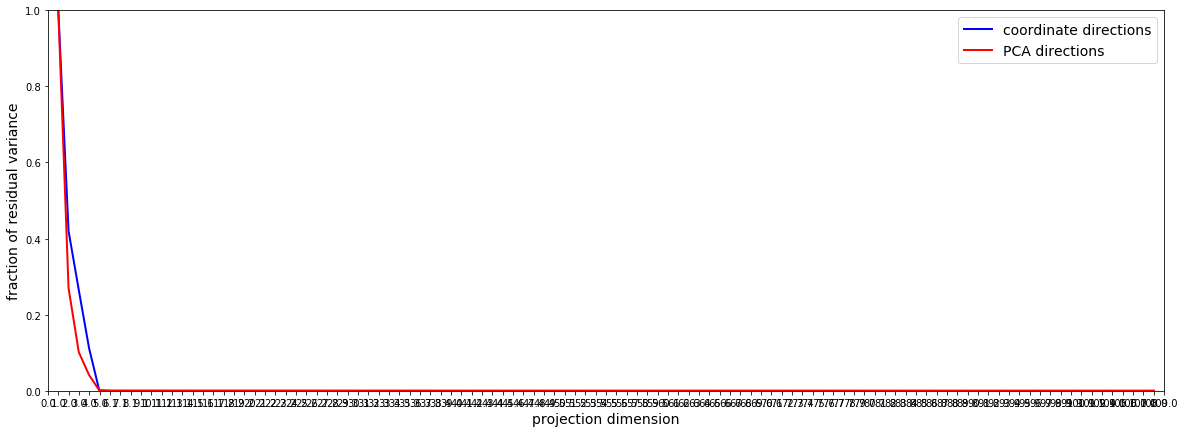

In [105]:
plt.figure(figsize=(20,7))

# Compute fraction of overall variance lost when projecting to k coordinate directions
total_coordinate_variance = np.cumsum(coordinate_variances)
total_coordinate_variance = total_coordinate_variance/total_coordinate_variance[108]
# Compute fraction of overall variance lost when projecting to k eigenvector directions
total_eigenvector_variance = np.cumsum(eigenvector_variances)
total_eigenvector_variance = total_eigenvector_variance/total_eigenvector_variance[108]
# Plot these results
plt.plot(np.arange(1,109), total_coordinate_variance[109:0:-1], 'b-', lw=2)
plt.plot(np.arange(1,109), total_eigenvector_variance[109:0:-1], 'r-', lw=2)
plt.xlabel('projection dimension', fontsize=14)
plt.ylabel('fraction of residual variance', fontsize=14)
plt.xticks(np.linspace(0,109,109))
plt.xlim(0,109)
plt.ylim(0.0,1.0)
plt.legend(['coordinate directions', 'PCA directions'], fontsize=14)
plt.show()

## Principal component analysis

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
df_cols= df.columns.tolist()
df_cols.remove('NU_INSCRICAO')
df_cols.remove('NU_NOTA_MT')

In [108]:
scaler = StandardScaler()

In [109]:
scaler.fit(df[df_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
scaled_data = scaler.transform(df[df_cols] )

In [111]:
#PCA
from sklearn.decomposition import PCA

In [112]:
pca = PCA(n_components=5)

In [113]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [114]:
x_pca = pca.transform(scaled_data)

In [115]:
scaled_data.shape

(10333, 109)

In [116]:
x_pca.shape

(10333, 5)

Text(0,0.5,'second principal component')

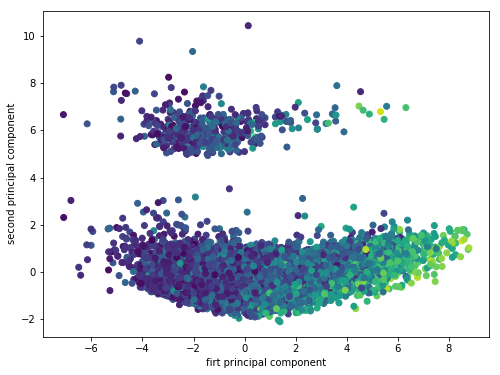

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,4], c=df['NU_NOTA_MT'])
plt.xlabel('firt principal component')
plt.ylabel('second principal component')

In [118]:
pca.components_.shape

(5, 109)

In [119]:
df_comp = pd.DataFrame(pca.components_, columns=df[df_cols].columns)

In [120]:
df_comp

,NU_IDADE,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,TP_SEXO_T,COR_1,COR_2,COR_3,COR_4,COR_5,NAC_1,NAC_2,NAC_3,NAC_4,CONC_2,CONC_3,CONC_4,ANO_1,ANO_2,ANO_3,ANO_4,ANO_5,ANO_6,ANO_7,ANO_8,ANO_9,ANO_10,ESC_2,ESC_3,RED_2.0,RED_3.0,RED_4.0,RED_5.0,RED_6.0,RED_7.0,RED_8.0,RED_9.0,PAI_B,PAI_C,PAI_D,PAI_E,PAI_F,PAI_G,PAI_H,MAE_B,MAE_C,MAE_D,MAE_E,MAE_F,MAE_G,MAE_H,REND_B,REND_C,REND_D,REND_E,REND_F,REND_G,REND_H,REND_I,REND_J,REND_K,REND_L,REND_M,REND_N,REND_O,REND_P,REND_Q,N_PC_B,N_PC_C,N_PC_D,N_PC_E,TRAB_B,TRAB_C,EM_B,EM_C,EM_D,EM_E
0,-0.117082,0.019859,-0.006509,-0.005077,0.293546,0.292686,0.291444,-0.172880,0.269733,0.212479,-0.014850,-0.030682,-0.016275,-0.033148,-0.107631,0.019652,0.015360,-0.007752,-0.037342,0.032555,0.000229,-0.012295,-0.028556,-0.016279,-0.009900,-0.018294,0.029973,0.049199,-0.007710,-0.018292,-0.008469,0.017575,0.043299,-0.008939,0.100298,-0.011410,-0.008751,0.181865,-0.042661,-0.145114,-0.007716,-0.012803,0.052814,-0.053936,0.002397,-0.004677,0.048451,-0.001964,-0.049540,0.033937,0.006868,-0.004547,-0.017387,-0.017199,-0.016829,-0.013449,-0.017173,-0.021157,-0.050875,-0.051739,0.197057,-0.010066,-0.021264,-0.038523,-0.012296,-0.053516,-0.014988,-0.010436,-0.027810,-0.144211,-0.048093,-0.008101,0.104973,0.162644,0.158330,-0.064970,-0.137992,-0.076717,-0.028334,0.074468,0.149179,0.155597,-0.061423,-0.191822,-0.071872,0.001681,0.031193,0.045520,0.062735,0.088664,0.088181,0.081147,0.073809,0.068298,0.062757,0.086011,0.091499,0.073696,0.114541,0.061138,0.138896,0.137322,0.095686,-0.058476,-0.049451,0.025983,0.011382,0.268182,0.073673
1,0.423656,-0.116707,0.006842,0.001340,0.071157,0.114030,0.090560,0.032322,0.024277,0.044279,0.011265,0.037627,0.022042,0.030109,-0.194608,0.021228,0.008157,-0.017827,0.015879,0.051091,0.007483,0.019484,0.027139,0.009964,0.018171,0.004788,0.009839,0.023750,0.055585,0.042181,-0.007455,0.032934,-0.039231,0.009734,-0.029263,0.005233,-0.030573,0.012691,0.055586,-0.051874,-0.003575,0.002060,0.055613,-0.057335,0.012104,-0.006774,-0.434627,-0.108609,0.107898,0.099135,0.090727,0.099103,0.098089,0.093982,0.087123,0.091257,0.085505,0.090981,0.299946,-0.410913,-0.084364,-0.015629,-0.020219,-0.011838,-0.016731,0.002356,0.000935,-0.018599,0.018333,0.126866,-0.020463,-0.045535,-0.019647,-0.008916,-0.002549,-0.085656,0.112157,0.020131,-0.036237,-0.051238,-0.007668,0.000326,-0.094305,-0.094237,0.016491,0.037382,0.034178,0.021884,0.023607,-0.005788,0.018330,-0.002948,0.002459,-0.000772,0.004659,0.001862,0.004586,0.002219,-0.009609,0.063792,-0.005868,-0.003793,-0.004341,0.197320,0.200245,0.031964,0.022503,0.003430,0.007869
2,-0.093211,0.469279,0.010233,-0.004708,-0.005104,-0.053099,-0.048966,0.020552,-0.035296,-0.117570,0.025008,-0.016541,0.004436,0.024006,0.133969,-0.021079,-0.030614,0.008787,0.042421,-0.014720,-0.008173,-0.002682,0.048540,0.014194,0.033144,0.029606,-0.047902,-0.031379,0.011932,-0.005183,0.014228,-0.051215,-0.046706,0.030855,-0.113882,0.010222,0.013726,-0.064633,-0.020887,0.065217,0.031262,0.001492,0.003003,-0.004707,-0.001005,0.002223,-0.336263,0.480975,-0.009365,0.026152,0.008877,-0.000667,0.002701,-0.014237,-0.008637,-0.014091,-0.007327,-0.010683,-0.054956,-0.344207,-0.014692,0.001525,0.034975,0.025095,0.007562,0.025341,0.021304,-0.007274,-0.000678,-0.010058,-0.016047,-0.024881,-0.081053,0.077791,0.112665,0.034228,-0.011582,-0.010847,-0.030114,-0.078054,0.056688,0.105719,0.059239,0.156513,-0.073682,-0.080493,-0.076763,-0.064563,-0.064549,-0.015618,0.014923,0.020204,0.031221,0.049343,0.045115,0.059200,0.070291,0.062721,0.087527,-0.170325,0.022984,0.081383,0.077795,-0.075136,-0.117573,-0.030784,-0.009684,0.164272,0.012122
3,0.148861,-0.257248,-0.004274,0.004188,0.110595,0.065813,0.026383,0.048977,0.035531,-0.211967,0.007033,0.025240,0.024349,-0.009716,0.142066,0.024142,-0.005101,-0.030102,0.034763,-0.066855,-0.014344,-0.004129,0.059591,0.035310,0.

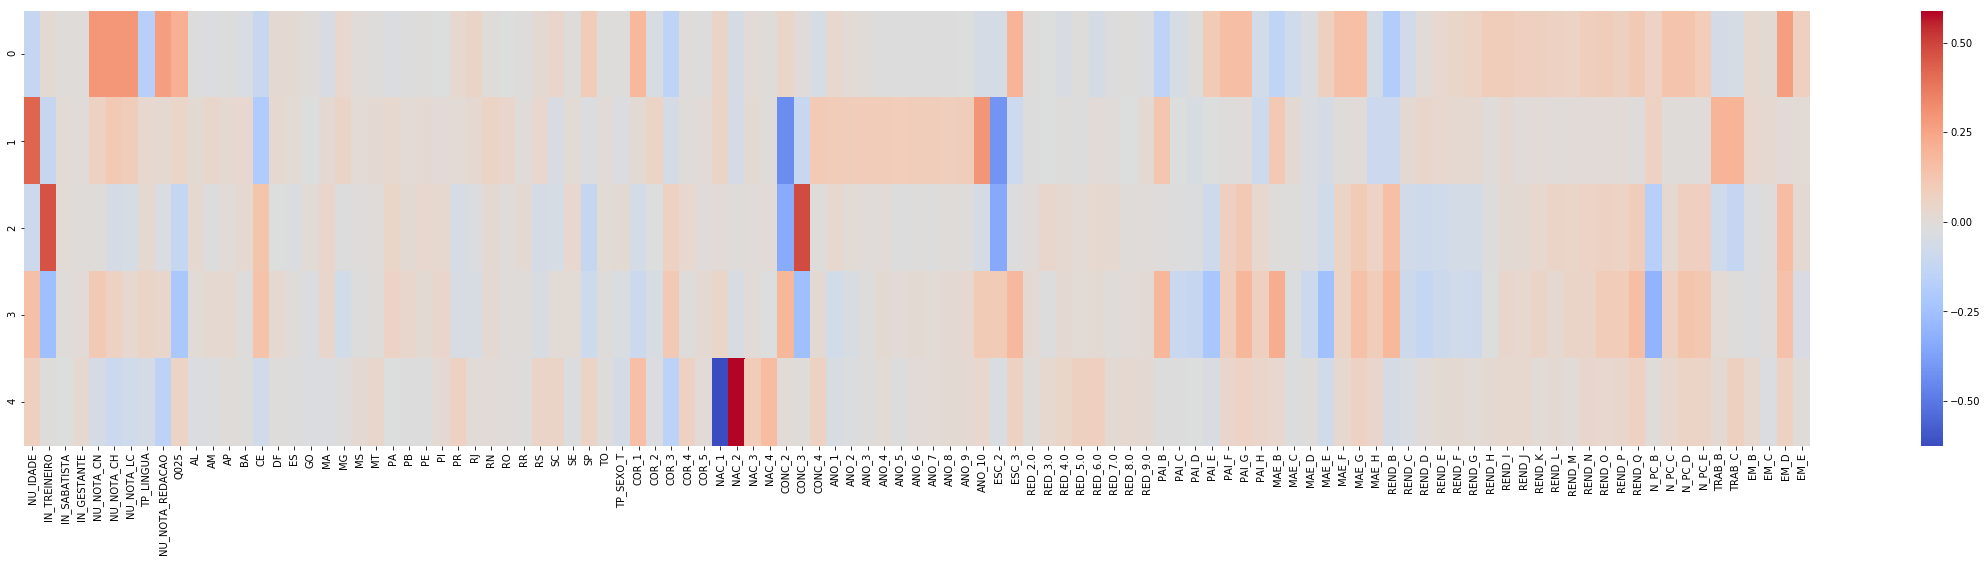

In [121]:
plt.figure(figsize=(40,8))
sns.heatmap(data=df_comp, cmap='coolwarm')

In [122]:
df_comp[df_comp < -0.025]

,NU_IDADE,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,TP_SEXO_T,COR_1,COR_2,COR_3,COR_4,COR_5,NAC_1,NAC_2,NAC_3,NAC_4,CONC_2,CONC_3,CONC_4,ANO_1,ANO_2,ANO_3,ANO_4,ANO_5,ANO_6,ANO_7,ANO_8,ANO_9,ANO_10,ESC_2,ESC_3,RED_2.0,RED_3.0,RED_4.0,RED_5.0,RED_6.0,RED_7.0,RED_8.0,RED_9.0,PAI_B,PAI_C,PAI_D,PAI_E,PAI_F,PAI_G,PAI_H,MAE_B,MAE_C,MAE_D,MAE_E,MAE_F,MAE_G,MAE_H,REND_B,REND_C,REND_D,REND_E,REND_F,REND_G,REND_H,REND_I,REND_J,REND_K,REND_L,REND_M,REND_N,REND_O,REND_P,REND_Q,N_PC_B,N_PC_C,N_PC_D,N_PC_E,TRAB_B,TRAB_C,EM_B,EM_C,EM_D,EM_E
0,-0.117082,NaN,NaN,NaN,NaN,NaN,NaN,-0.17288,NaN,NaN,NaN,-0.030682,NaN,-0.033148,-0.107631,NaN,NaN,NaN,-0.037342,NaN,NaN,NaN,-0.028556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.042661,-0.145114,NaN,NaN,NaN,-0.053936,NaN,NaN,NaN,NaN,-0.04954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050875,-0.051739,NaN,NaN,NaN,-0.038523,NaN,-0.053516,NaN,NaN,-0.02781,-0.144211,-0.048093,NaN,NaN,NaN,NaN,-0.064970,-0.137992,-0.076717,-0.028334,NaN,NaN,NaN,-0.061423,-0.191822,-0.071872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.058476,-0.049451,NaN,NaN,NaN,NaN
1,NaN,-0.116707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.194608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.039231,NaN,-0.029263,NaN,-0.030573,NaN,NaN,-0.051874,NaN,NaN,NaN,-0.057335,NaN,NaN,-0.434627,-0.108609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.410913,-0.084364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.045535,NaN,NaN,NaN,-0.085656,NaN,NaN,-0.036237,-0.051238,NaN,NaN,-0.094305,-0.094237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.093211,NaN,NaN,NaN,NaN,-0.053099,-0.048966,NaN,-0.035296,-0.117570,NaN,NaN,NaN,NaN,NaN,NaN,-0.030614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047902,-0.031379,NaN,NaN,NaN,-0.051215,-0.046706,NaN,-0.113882,NaN,NaN,-0.064633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.336263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.054956,-0.344207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.081053,NaN,NaN,NaN,NaN,NaN,-0.030114,-0.078054,NaN,NaN,NaN,NaN,-0.073682,-0.080493,-0.076763,-0.064563,-0.064549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.170325,NaN,NaN,NaN,-0.075136,-0.117573,-0.030784,NaN,NaN,NaN
3,NaN,-0.257248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.211967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030102,NaN,-0.066855,NaN,NaN,NaN,NaN,NaN,NaN,-0.045159,-0.041862,NaN,NaN,NaN,-0.042567,NaN,NaN,-0.086123,NaN,-0.033384,-0.095521,-0.042902,NaN,NaN,NaN,NaN,-0.045705,NaN,NaN,NaN,-0.256576,NaN,-0.069174,-0.044334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.105861,-0.113905,-0.221807,NaN,NaN,NaN,NaN,NaN,-0.094985,-0.253318,NaN,NaN,NaN,NaN,-0.091872,-0.121160,-0.092808,-0.074609,-0.079680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.305091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036547
4,NaN,NaN,NaN,NaN,-0.054242,-0.096913,-0.078122,-0.05371,-0.146740,NaN,-0.029879,NaN,NaN,NaN,-0.074047,NaN,NaN,-0.026993,-0.030609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.056692,NaN,-0.027522,-0.154400,NaN,NaN,-0.624102,NaN,NaN,NaN,NaN,NaN,NaN,-0.042572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.031782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.040155,NaN,NaN,NaN,NaN,NaN,NaN,-0.071949,NaN,NaN,NaN,-0.054838,-0.034676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.028805,NaN,NaN


In [123]:
pca_gold_025 = ['NU_IDADE', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_REDACAO','NAC_1','NAC_2', 'CONC_2','CONC_3', 'ANO_10', 'ESC_2','MAE_E','N_PC_B','EM_D']
# score = 90.03

In [124]:
pca_gold_017 = ['NU_IDADE', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','TP_LINGUA','NU_NOTA_REDACAO','CE','Q025','COR_1','NAC_1','NAC_2','CONC_2', 'CONC_3', 'ANO_10','ESC_2','ESC_3','PAI_B','PAI_E','PAI_G','MAE_B','MAE_E','REND_B','N_PC_B','TRAB_B','TRAB_C', 'EM_D']
#score = 90.10

In [125]:
pca_gold_005 = ['NU_IDADE', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','TP_LINGUA','NU_NOTA_REDACAO','Q025','CE','MG','PA','PR','RN','RS','SC','SP','TP_SEXO_T','COR_1','COR_2','COR_3','COR_4','NAC_1','NAC_2','NAC_3','NAC_4','CONC_2', 'CONC_3','CONC_4','ANO_1','ANO_2','ANO_3','ANO_4', 'ANO_5','ANO_6','ANO_7','ANO_8','ANO_9','ANO_10','ESC_2','ESC_3','RED_5.0','RED_6.0','PAI_B','PAI_C','PAI_D','PAI_E','PAI_F','PAI_G','PAI_H','MAE_B','MAE_C','MAE_D','MAE_E','MAE_F','MAE_G','MAE_H','REND_B','REND_C','REND_D','REND_E','REND_F','REND_G','REND_H','REND_I','REND_J','REND_K','REND_L','REND_M','REND_N','REND_O','REND_P','REND_Q','N_PC_B','N_PC_C','N_PC_D','N_PC_E','TRAB_B','TRAB_C', 'EM_D','EM_E']
#score= 90.26749911355819

In [126]:
pca_gold_00025 = ['NU_IDADE', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','TP_LINGUA','NU_NOTA_REDACAO','Q025','AL','AM','BA','CE','DF','ES','GO','MA','MG','MT','PA','PB','PE','PI','PR','RJ','RN','RO','RS','SC','SE','SP','TP_SEXO_T','COR_1','COR_2','COR_3','COR_4','NAC_1','NAC_2','NAC_3','NAC_4','CONC_2', 'CONC_3','CONC_4','ANO_1','ANO_2','ANO_3','ANO_4', 'ANO_5','ANO_6','ANO_7','ANO_8','ANO_9','ANO_10','ESC_2','ESC_3','RED_3.0','RED_4.0','RED_5.0','RED_6.0','RED_9.0','PAI_B','PAI_C','PAI_D','PAI_E','PAI_F','PAI_G','PAI_H','MAE_B','MAE_C','MAE_D','MAE_E','MAE_F','MAE_G','MAE_H','REND_B','REND_C','REND_D','REND_E','REND_F','REND_G','REND_H','REND_I','REND_J','REND_K','REND_L','REND_M','REND_N','REND_O','REND_P','REND_Q','N_PC_B','N_PC_C','N_PC_D','N_PC_E','TRAB_B','TRAB_C','EM_B','EM_C','EM_D','EM_E']
#score= 90.27067773317063

In [127]:
sabatista, gestante, ap, ms, rr, cor_5, red2, red7, red8,

NameError: name 'sabatista' is not defined

In [128]:
df[pca_gold_00025].columns

Index(['NU_IDADE', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'NU_NOTA_REDACAO', 'Q025', 'AL', 'AM', 'BA', 'CE', 'DF',
       'ES', 'GO', 'MA', 'MG', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN',
       'RO', 'RS', 'SC', 'SE', 'SP', 'TP_SEXO_T', 'COR_1', 'COR_2', 'COR_3',
       'COR_4', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'CONC_2', 'CONC_3',
       'CONC_4', 'ANO_1', 'ANO_2', 'ANO_3', 'ANO_4', 'ANO_5', 'ANO_6', 'ANO_7',
       'ANO_8', 'ANO_9', 'ANO_10', 'ESC_2', 'ESC_3', 'RED_3.0', 'RED_4.0',
       'RED_5.0', 'RED_6.0', 'RED_9.0', 'PAI_B', 'PAI_C', 'PAI_D', 'PAI_E',
       'PAI_F', 'PAI_G', 'PAI_H', 'MAE_B', 'MAE_C', 'MAE_D', 'MAE_E', 'MAE_F',
       'MAE_G', 'MAE_H', 'REND_B', 'REND_C', 'REND_D', 'REND_E', 'REND_F',
       'REND_G', 'REND_H', 'REND_I', 'REND_J', 'REND_K', 'REND_L', 'REND_M',
       'REND_N', 'REND_O', 'REND_P', 'REND_Q', 'N_PC_B', 'N_PC_C', 'N_PC_D',
       'N_PC_E', 'TRAB_B', 'TRAB_C', 'EM_B', 'EM_C', 'EM_D', 'EM_E'],
      dty

# linear reg

In [129]:
df_cols= df.columns.tolist()
df_cols.remove('NU_INSCRICAO')
df_cols.remove('NU_NOTA_MT')
X = df[pca_gold_00025]
y = df['NU_NOTA_MT']

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lm = LinearRegression(fit_intercept=False)

In [134]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [135]:
print(lm.intercept_)

0.0


In [136]:
lm.coef_

array([ -5.92215014e-01,   3.79134936e+00,   3.59694634e-01,
         8.24530674e-02,   2.13368346e-01,  -1.23055479e+01,
         6.13554115e-02,   2.75664231e+00,  -3.42004742e+00,
        -1.13313836e+01,  -7.96495357e+00,   2.54293597e+00,
         2.22659990e+00,   1.13024178e+01,   1.50429525e+00,
        -7.90978745e+00,   1.31688122e+01,   6.62413436e+00,
        -6.85989665e+00,  -6.94272064e-02,   1.60473062e+00,
        -9.68406712e-01,   5.36637446e+00,  -6.74716634e-01,
        -1.07073074e+01,   9.19819557e+00,   8.34935749e+00,
         1.82600348e+01,  -1.13897019e+01,   3.96182675e+00,
        -2.80360588e+01,   8.67044023e+00,  -5.07926277e+00,
         5.90025046e+00,  -1.09591687e-01,  -1.09717439e+01,
        -1.18893376e+01,   9.94105147e+00,  -2.59140248e+01,
         1.02535526e+02,   1.45082843e+02,   1.61601399e+02,
         1.62179594e+02,   1.59778444e+02,   1.70625057e+02,
         1.60611978e+02,   1.62899562e+02,   1.52456386e+02,
         1.73308479e+02,

In [137]:
X_train.columns

Index(['NU_IDADE', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'NU_NOTA_REDACAO', 'Q025', 'AL', 'AM', 'BA', 'CE', 'DF',
       'ES', 'GO', 'MA', 'MG', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN',
       'RO', 'RS', 'SC', 'SE', 'SP', 'TP_SEXO_T', 'COR_1', 'COR_2', 'COR_3',
       'COR_4', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'CONC_2', 'CONC_3',
       'CONC_4', 'ANO_1', 'ANO_2', 'ANO_3', 'ANO_4', 'ANO_5', 'ANO_6', 'ANO_7',
       'ANO_8', 'ANO_9', 'ANO_10', 'ESC_2', 'ESC_3', 'RED_3.0', 'RED_4.0',
       'RED_5.0', 'RED_6.0', 'RED_9.0', 'PAI_B', 'PAI_C', 'PAI_D', 'PAI_E',
       'PAI_F', 'PAI_G', 'PAI_H', 'MAE_B', 'MAE_C', 'MAE_D', 'MAE_E', 'MAE_F',
       'MAE_G', 'MAE_H', 'REND_B', 'REND_C', 'REND_D', 'REND_E', 'REND_F',
       'REND_G', 'REND_H', 'REND_I', 'REND_J', 'REND_K', 'REND_L', 'REND_M',
       'REND_N', 'REND_O', 'REND_P', 'REND_Q', 'N_PC_B', 'N_PC_C', 'N_PC_D',
       'N_PC_E', 'TRAB_B', 'TRAB_C', 'EM_B', 'EM_C', 'EM_D', 'EM_E'],
      dty

In [138]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
NU_IDADE,-0.592215
IN_TREINEIRO,3.791349
NU_NOTA_CN,0.359695
NU_NOTA_CH,0.082453
NU_NOTA_LC,0.213368
TP_LINGUA,-12.305548
NU_NOTA_REDACAO,0.061355
Q025,2.756642
AL,-3.420047
AM,-11.331384


In [139]:
predictions = lm.predict(X_test)

In [140]:
predictions

array([ 419.0384577 ,  467.65089918,  567.12544376, ...,  271.82199925,
        736.17559104,  438.17063892])

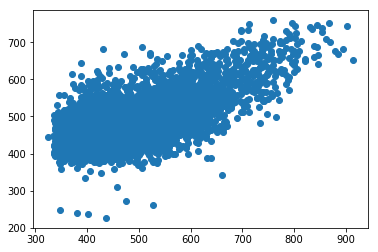

In [141]:
plt.scatter(y_test, predictions)

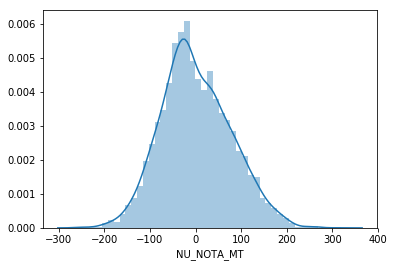

In [142]:
sns.distplot((y_test-predictions))

In [143]:
from sklearn import metrics

In [144]:
metrics.mean_absolute_error(y_test, predictions)

61.345091454578977

In [145]:
metrics.mean_squared_error(y_test, predictions)

5836.8176594036413

In [146]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

76.399068445915233

# Test

In [ ]:
pred_features.info()

In [ ]:
pred_features.head()

In [ ]:
predictions = lm.predict(pred_features[pca_gold_00025])

In [ ]:
predictions

In [161]:
pred1['NU_NOTA_MT'] = predictions

NameError: name 'predictions' is not defined

In [162]:
pred1

,NU_INSCRICAO,NU_IDADE,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,TP_SEXO_T,COR_1,COR_2,COR_3,COR_4,COR_5,NAC_1,NAC_2,NAC_3,NAC_4,CONC_2,CONC_3,CONC_4,ANO_1,ANO_2,ANO_3,ANO_4,ANO_5,ANO_6,ANO_7,ANO_8,ANO_9,ANO_10,ESC_2,ESC_3,RED_2.0,RED_3.0,RED_4.0,RED_5.0,RED_6.0,RED_8.0,RED_9.0,RED_7.0,PAI_B,PAI_C,PAI_D,PAI_E,PAI_F,PAI_G,PAI_H,MAE_B,MAE_C,MAE_D,MAE_E,MAE_F,MAE_G,MAE_H,REND_B,REND_C,REND_D,REND_E,REND_F,REND_G,REND_H,REND_I,REND_J,REND_K,REND_L,REND_M,REND_N,REND_O,REND_P,REND_Q,N_PC_B,N_PC_C,N_PC_D,N_PC_E,TRAB_B,TRAB_C,EM_B,EM_C,EM_D,EM_E
0,308f78623f08debb592f85560c1b87b5df05e364,44,0,0,0,1,491.8,521.1,546.4,1,380.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0ef34d3340773d13c98ecc8fcd888150a24c63c3,17,0,0,0,1,676.5,697.5,662.5,0,900.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,e5a70516338bf0a1b0d7ccda3ed995a7400a95ff,17,0,0,0,1,407.8,517.6,610.9,0,480.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1eda43516bcc8b2f081e447535c73579cb030b7e,19,0,0,0,1,449.7,525.5,537.4,0,440.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,b5b00cb4cb52757ea34990f4c2072c4d059068b7,20,0,0,0,1,602.9,618.4,645.0,0,560.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
5,5915ff2ff7e38acb79e959ec686ea285b6706811,19,0,0,0,0,479.2,469.8,0.0,0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
6,04db762f3b5797408ebec6d09e195c90645f5df8,19,0,0,0,1,538.6,587.2,555.9,0,500.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7,7ba40cf2bd87d85e6fc8fae74a8bb6fdbe03a5b8,17,0,0,0,1,387.7,540.3,506.5,0,560.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,86271f928d9d6e0518b2f7ed84bb19f0e4a57ee8,28,0,0,0,0,0.0,0.0,0.0,1,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,bbc4b0e29652ec752130033fd9a249c91b5782ee,26,0,0,0,1,593.5,642.6,633.0,1,620.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [163]:
P_LC = pred1['TP_PRESENCA_LC'] == 0

In [164]:
pred1['NU_NOTA_MT'][P_LC] = 0

KeyError: 'NU_NOTA_MT'

In [165]:
pred1.head(100)

,NU_INSCRICAO,NU_IDADE,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,TP_SEXO_T,COR_1,COR_2,COR_3,COR_4,COR_5,NAC_1,NAC_2,NAC_3,NAC_4,CONC_2,CONC_3,CONC_4,ANO_1,ANO_2,ANO_3,ANO_4,ANO_5,ANO_6,ANO_7,ANO_8,ANO_9,ANO_10,ESC_2,ESC_3,RED_2.0,RED_3.0,RED_4.0,RED_5.0,RED_6.0,RED_8.0,RED_9.0,RED_7.0,PAI_B,PAI_C,PAI_D,PAI_E,PAI_F,PAI_G,PAI_H,MAE_B,MAE_C,MAE_D,MAE_E,MAE_F,MAE_G,MAE_H,REND_B,REND_C,REND_D,REND_E,REND_F,REND_G,REND_H,REND_I,REND_J,REND_K,REND_L,REND_M,REND_N,REND_O,REND_P,REND_Q,N_PC_B,N_PC_C,N_PC_D,N_PC_E,TRAB_B,TRAB_C,EM_B,EM_C,EM_D,EM_E
0,308f78623f08debb592f85560c1b87b5df05e364,44,0,0,0,1,491.8,521.1,546.4,1,380.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0ef34d3340773d13c98ecc8fcd888150a24c63c3,17,0,0,0,1,676.5,697.5,662.5,0,900.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,e5a70516338bf0a1b0d7ccda3ed995a7400a95ff,17,0,0,0,1,407.8,517.6,610.9,0,480.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1eda43516bcc8b2f081e447535c73579cb030b7e,19,0,0,0,1,449.7,525.5,537.4,0,440.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,b5b00cb4cb52757ea34990f4c2072c4d059068b7,20,0,0,0,1,602.9,618.4,645.0,0,560.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
5,5915ff2ff7e38acb79e959ec686ea285b6706811,19,0,0,0,0,479.2,469.8,0.0,0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
6,04db762f3b5797408ebec6d09e195c90645f5df8,19,0,0,0,1,538.6,587.2,555.9,0,500.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7,7ba40cf2bd87d85e6fc8fae74a8bb6fdbe03a5b8,17,0,0,0,1,387.7,540.3,506.5,0,560.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,86271f928d9d6e0518b2f7ed84bb19f0e4a57ee8,28,0,0,0,0,0.0,0.0,0.0,1,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,bbc4b0e29652ec752130033fd9a249c91b5782ee,26,0,0,0,1,593.5,642.6,633.0,1,620.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [382]:
pred10 = pd.read_csv('predictions.csv')

In [383]:
pred10['NU_INSCRICAO'] = predict['NU_INSCRICAO']

In [384]:
pred10.drop(['Unnamed: 0'], axis=1, inplace=True)

In [385]:
pred10.columns = ['NU_NOTA_MT','NU_INSCRICAO']

In [386]:
pred10.head()

,NU_NOTA_MT,NU_INSCRICAO
0,501.088989,308f78623f08debb592f85560c1b87b5df05e364
1,769.354980,0ef34d3340773d13c98ecc8fcd888150a24c63c3
2,445.472992,e5a70516338bf0a1b0d7ccda3ed995a7400a95ff
3,437.893005,1eda43516bcc8b2f081e447535c73579cb030b7e
4,637.713013,b5b00cb4cb52757ea34990f4c2072c4d059068b7


In [387]:
Colunas_desejadas = ['NU_INSCRICAO','NU_NOTA_MT']

In [388]:
pred10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Data columns (total 2 columns):
NU_NOTA_MT      4522 non-null float64
NU_INSCRICAO    4522 non-null object
dtypes: float64(1), object(1)
memory usage: 70.7+ KB


In [389]:
Final_summit = pred10

In [390]:
dic = Final_summit.to_dict("records")

In [391]:
dicf = {
  "token": "e2579c92a6ab22c1f8b612128ac33198167127c1",
  "email": "tiago.shink@gmail.com",
  "answer": dic}

In [392]:
import requests

In [393]:
r = requests.get('https://api.codenation.com.br/v1/user/acceleration/data-science/challenge/enem-2/submit')

In [394]:
r = requests.post('https://api.codenation.com.br/v1/user/acceleration/data-science/challenge/enem-2/submit', json = dicf)

In [395]:
print(r.text)

{"score":90.58882470318308}



In [ ]:
#score padrão [df_cols] = 90.26425808546132

In [ ]:
#score cubist = "score":90.58882470318308